In [17]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('islander_data.csv')

exp_sample = df.groupby('Drug').sample(30, replace=True)
print(exp_sample.value_counts('Drug'))

Drug
A    30
S    30
T    30
Name: count, dtype: int64


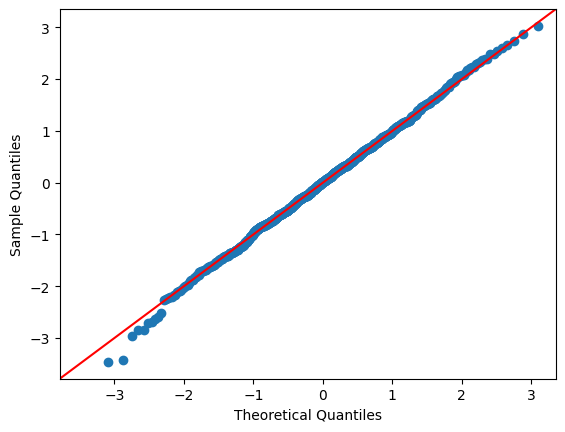

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

normal_data = np.random.normal(0,1, 1000)

sm.qqplot(normal_data, line='45')
plt.show()

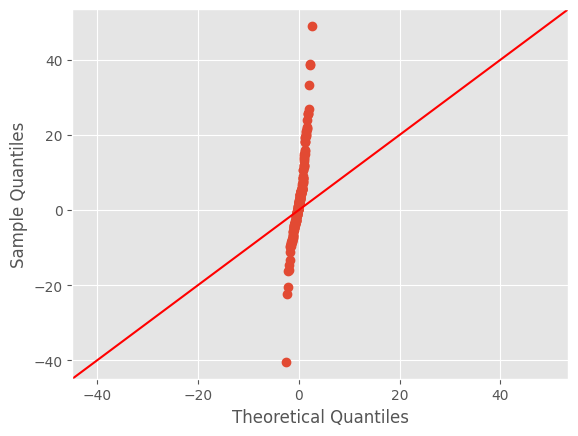

In [19]:
sm.qqplot(df['Diff'], line='45') #–ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ø–æ –∫—Ä–∞—Å–Ω–æ–π –ª–∏–Ω–∏–∏ - –∏–¥–µ–∞–ª –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ
plt.show()

<Axes: title={'center': 'Diff'}, xlabel='Happy_Sad_group'>

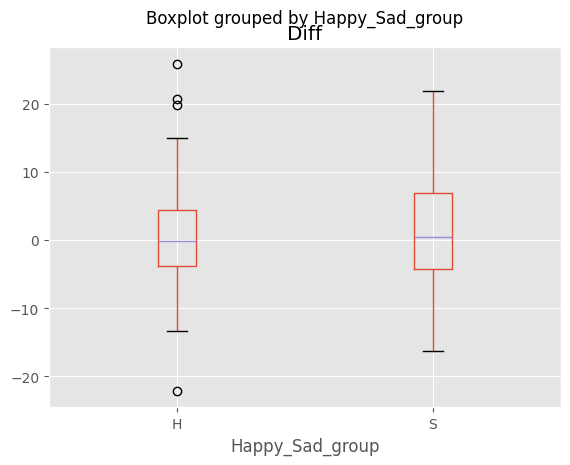

In [20]:
exp_sample.boxplot(by = 'Happy_Sad_group', column =['Diff'], grid = True)

<Axes: title={'center': 'Diff'}, xlabel='Drug'>

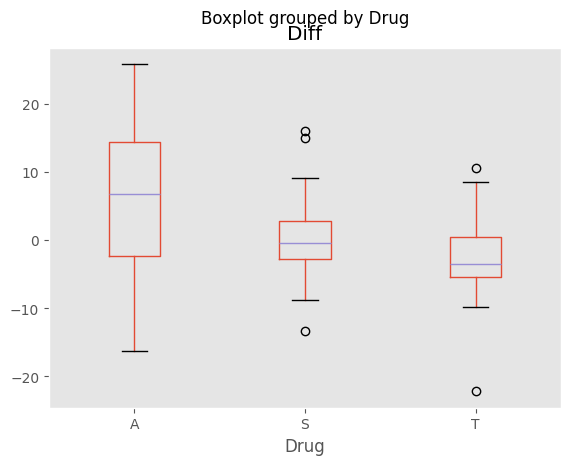

In [21]:
exp_sample.boxplot(by = 'Drug', column =['Diff'], grid = False)


(<Figure size 640x480 with 3 Axes>, {('1', 'H'): (0.0, np.float64(0.0), 0.35203520352035206, np.float64(0.4983388704318937)), ('1', 'S'): (0.0, np.float64(0.5016611295681063), 0.35203520352035206, np.float64(0.4983388704318937)), ('3', 'H'): (0.356985698569857, np.float64(0.0), 0.25302530253025307, np.float64(0.520005777841976)), ('3', 'S'): (0.356985698569857, np.float64(0.5233280369781885), 0.25302530253025307, np.float64(0.4766719630218113)), ('2', 'H'): (0.614961496149615, np.float64(0.0), 0.38503850385038496, np.float64(0.6549596582819174)), ('2', 'S'): (0.614961496149615, np.float64(0.6582819174181299), 0.38503850385038496, np.float64(0.3417180825818699))})


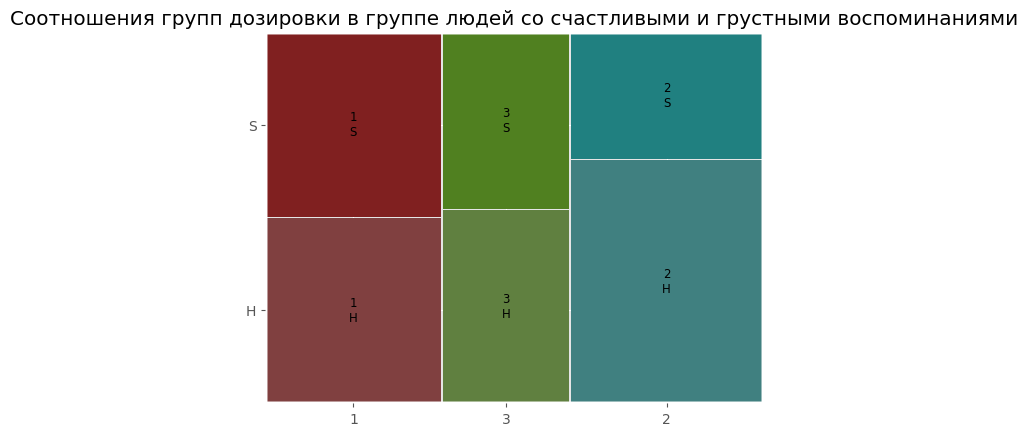

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
print(mosaic(exp_sample, ['Dosage','Happy_Sad_group'], title = '–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –≥—Ä—É–ø–ø –¥–æ–∑–∏—Ä–æ–≤–∫–∏ –≤ –≥—Ä—É–ø–ø–µ –ª—é–¥–µ–π —Å–æ —Å—á–∞—Å—Ç–ª–∏–≤—ã–º–∏ –∏ –≥—Ä—É—Å—Ç–Ω—ã–º–∏ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è–º–∏'))

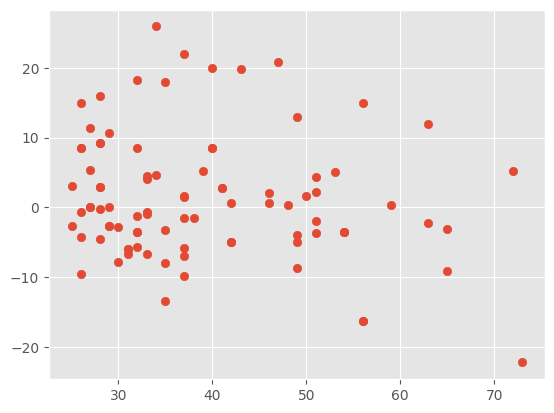

In [23]:
plt.scatter(exp_sample['age'], exp_sample['Diff'])
plt.show()

In [24]:
k, b = np.polyfit(exp_sample['age'], exp_sample['Diff'], 1) # –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

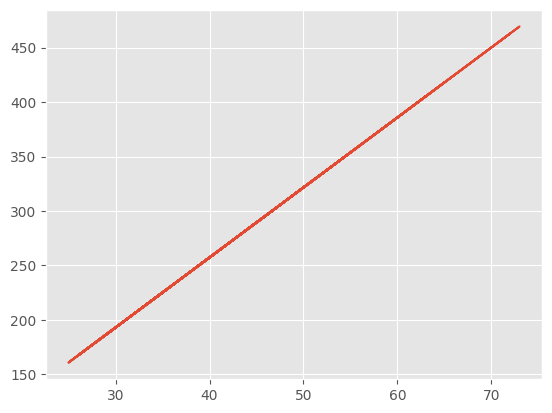

In [25]:
plt.plot(exp_sample['age'], k*(exp_sample['age'])+b*exp_sample['age'] )

In [26]:
a = np.corrcoef(df['age'], df['Diff'], 1)[0][1]
a

np.float64(-0.009293328126756114)

In [3]:
import pandas as pd
df = pd.read_csv('Patient Survival.csv')
df = df.groupby('Treated_with_drugs').sample(500)
# df.shape
df = df[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year']]
print(df.shape)

(1000, 5)


In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

nm = np.random.normal(0, 1, 1000)

# sm.qqplot(df['Diagnosed_Condition'], line='45')
df['Diagnosed_Condition'].max()

np.int64(52)

In [29]:
from scipy.stats import shapiro # –ö—Ä–∏—Ç–µ—Ä–∏–π –®–∞–ø–∏—Ä–æ - –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –≤—ã–±–æ—Ä–∫–∏
n = 0                           # H0 - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. –¥–∞–ª–µ–µ –≤ —Ç—Ç–µ—Å—Ç–µ –µ—Å—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–π —Ñ–ª–∞–≥ –¥–ª—è —ç—Ç–æ–≥–æ
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9988993772632974), pvalue=np.float64(0.9915404969595836))

In [30]:
n = 0
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9953508744433827), pvalue=np.float64(0.14118726958850475))

In [31]:
from scipy.stats import levene # –∫—Ä–∏—Ç–µ–π—Ä–∏–π –ª–µ–≤–µ–Ω–∞. H0 - –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã –≤ –≤—ã–±–æ—Ä–∫–∞—Ö
s1 = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition']
s2 = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition']
levene(s1, s2)


LeveneResult(statistic=np.float64(0.0646939918875914), pvalue=np.float64(0.7994890273080355))

In [32]:
from scipy.stats import ttest_ind
ttest_ind(df[df['Patient_Smoker'] == 'NO']['Diagnosed_Condition'], df[df['Patient_Smoker'] == 'YES']['Diagnosed_Condition'], equal_var=True)

TtestResult(statistic=np.float64(-0.9301743083084053), pvalue=np.float64(0.3525057785691026), df=np.float64(998.0))

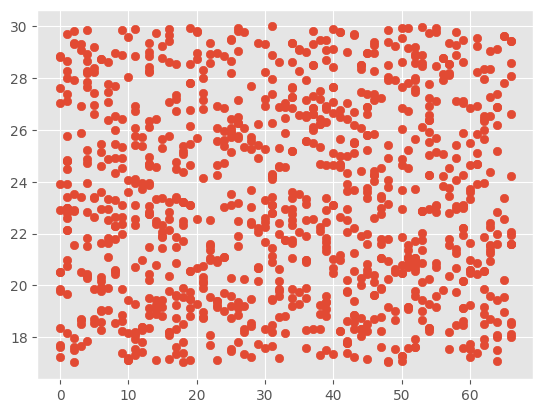

In [33]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])

array([[1.        , 0.02059896],
       [0.02059896, 1.        ]])

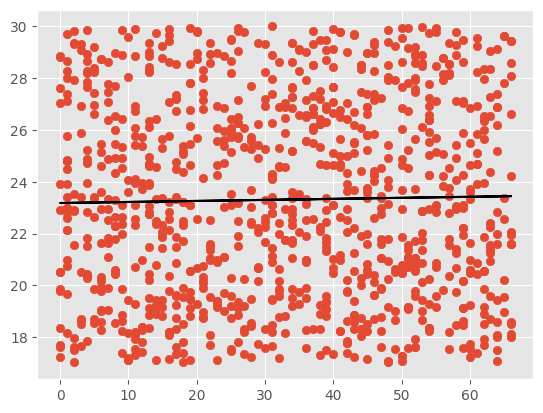

In [34]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])
a, b = np.polyfit(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'], deg=1)
plt.plot(df['Patient_Age'], a*df['Patient_Age'] + b, color='black')
q = np.corrcoef(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'])
# plt.show()
q

## –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
–£—Ä–∞–≤–Ω–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–¢–∏–ø: –ü–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π.

–ü—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è: –∫–æ–≥–¥–∞ –º—ã —Ö–æ—Ç–∏–º –æ—Ü–µ–Ω–∏—Ç—å —Å–≤—è–∑—å –º–µ–∂–¥—É –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ–¥–Ω–æ–π –∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.

–ü—Ä–æ–≤–µ—Ä—è–µ—Ç: –µ—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –∫–∞–∂–¥–æ–π –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.

–î–∞–Ω–Ω—ã–µ: —Ö–æ—Ç—è –±—ã –¥–≤–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –æ–¥–Ω–∞ –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∑–∞–≤–∏—Å–∏–º–∞—è.

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ –∫–∞–∂–¥–æ–π –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä–∞–≤–µ–Ω –Ω—É–ª—é (—Ç.–µ. –Ω–µ—Ç —Å–≤—è–∑–∏ –º–µ–∂–¥—É –∑–∞–≤–∏—Å–∏–º–æ–π –∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π).

–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ ‚Äî —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ä–∞–∑–Ω–∏—Ü –º–µ–∂–¥—É —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
RSS ‚Äî —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤—ã–≤–∞–µ—Ç—Å—è –∫–∞–∫ Residual Sum of Squares

–ß—Ç–æ–±—ã –≤—ã—á–∏—Å–ª–∏—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏, –º—ã –≤–æ–∑—å–º—ë–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (—Å–µ—Ä–µ–¥–∏–Ω–∞ –æ—Å–∏ y) –∏ –ø—Ä–æ–≤–µ–¥—ë–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—É—é –ª–∏–Ω–∏—é. –î–ª—è —ç—Ç–æ–π –ª–∏–Ω–∏–∏ –Ω–∞–º —Ç–æ–∂–µ –Ω—É–∂–Ω–æ –≤—ã—Å—á–∏—Ç–∞—Ç—å RSS (–≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –º—ã –Ω–∞–∑–æ–≤—ë–º –µ–≥–æ TSS). –ó–∞—Ç–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å –µ–≥–æ —Å RSS –∫–∞–∂–¥–æ–π –ª–∏–Ω–∏–∏ –∏ —Ä–µ—à–∏—Ç—å –ø—Ä–æ–ø–æ—Ä—Ü–∏—é:

RSS_L1/TSS = x%/100%

RSS_L2/TSS = x%/100%

RSS_L3/TSS = x%/100%

RSS_L4/TSS = x%/100%

–¢–æ –µ—Å—Ç—å, –º—ã –Ω–∞–π–¥—ë–º x –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–∏–º –∏—Ö –º–µ–∂–¥—É —Å–æ–±–æ–π. –ß–µ–º –æ–Ω –≤—ã—à–µ, —Ç–µ–º –ª—É—á—à–µ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

üîç –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ ‚Äî –¥–æ–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –æ–±—ä—è—Å–Ω—è–µ–º–∞—è —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º–æ–π –º–æ–¥–µ–ª—å—é.

–ò –ø–æ—Å–ª–µ–¥–Ω–µ–µ, —á—Ç–æ —Ç—É—Ç —Å—Ç–æ–∏—Ç —Å–∫–∞–∑–∞—Ç—å ‚Äî –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ —Ä–µ–¥–∫–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 8%. –ê –µ—â—ë —É –Ω–µ–≥–æ –µ—Å—Ç—å –≤—Ç–æ—Ä–æ–µ –∏–º—è ‚Äî ¬´–≠—Ä-–∫–≤–∞–¥—Ä–∞—Ç¬ª.

–î–æ–ø—É—â–µ–Ω–∏—è:

1. –õ–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
–ú–µ–∂–¥—É –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –µ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è —Å–≤—è–∑—å

2. –¢–∏–ø –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö 
–î–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º–∏ –∏–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏

3. –ù–∞–ª–∏—á–∏–µ –≤–∞—Ä–∏–∞—Ü–∏–∏
–ë–µ–∑ –≤–∞—Ä–∏–∞—Ü–∏–∏ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –º–æ–¥–µ–ª–∏

4. –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏
–ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã –Ω–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º

5. –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤–Ω–µ—à–Ω–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
–ù–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ —Å –¥–≤—É–º—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –≤ –º–æ–¥–µ–ª–∏

5. –ì–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å. –ì–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å ‚Äî –Ω–µ–ø–æ—Å—Ç–æ—è–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –æ—à–∏–±–∫–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.
–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–π

6. –ù–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
–ù–∞–±–ª—é–¥–µ–Ω–∏—è –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞

In [35]:
df = pd.read_csv('Spotify_Youtube.csv')

df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()
df['Duration'] = df['Duration_ms'] / 1000
df = df[(df['Duration'] < 300) & (df['Duration'] > 30)]
# np.nan(df['Duration'])

# df.columns

In [36]:
df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()

In [37]:
print(df.describe())

         Duration_ms  Danceability      Loudness   Speechiness        Energy
count   18646.000000  18646.000000  18646.000000  18646.000000  18646.000000
mean   206110.522150      0.626312     -7.536997      0.097840      0.638738
std     45703.952142      0.161589      4.577807      0.113562      0.213155
min     30985.000000      0.000000    -46.251000      0.000000      0.000055
25%    176144.000000      0.527000     -8.649750      0.035900      0.511000
50%    207264.500000      0.643000     -6.422000      0.051300      0.670000
75%    237559.000000      0.744000     -4.860000      0.107000      0.801000
max    299960.000000      0.975000      0.920000      0.964000      1.000000


In [38]:
import statsmodels.api as sm # –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è.
from statsmodels.regression.linear_model import OLS
X = df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
X = sm.add_constant(X, prepend=False)  #–¥–æ–±–∞–≤–ª—è–µ–º b_0
Y = df['Duration_ms']

model = OLS(Y, X)
res = model.fit()
res.summary()
# R-squared ‚Äî —ç—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏;
# –∫–æ–ª–æ–Ω–∫–∞ coef —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ b;
# –∫–æ–ª–æ–Ω–∫–∞ P>|t| —Å p_value ‚Äî –µ–≥–æ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.9
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          1.01e-189
Time:                        22:23:16   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18641   BIC:                         4.522e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.752e+04   2208.324    -12.463      0.000   -3.19e+04   -2.32e+04
Loudness      2039.6970    110.773     18.413      0.000    1822.572    2256.822
Speechiness  -3.976e+04   2953.889    -13.461      0.000   -4.56e+04    -3.4e+04
Energy       -3977.6190   2287.915     -1.739      0.082   -8462.141     506.903
const         2.452e+05   2711.798     90.402      0.000     2.4e+05     2.5e+05
==============================================================================
Omnibus:                       69.121   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.670
Skew:                          -0.147   Prob(JB):                     7.44e-16
Kurtosis:                       2.938   Cond. No.                         97.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

–≤–∏–¥–Ω–æ, —á—Ç–æ pvalue —É energy —á—Ç–æ-—Ç–æ –≤—ã—Å–æ–∫–æ–µ, –¥–∞–≤–∞–π—Ç–µ –µ–≥–æ –∏—Å–∫–ª—é—á–∏–º

In [39]:
X = df[['Danceability', 'Loudness', 'Speechiness']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     300.2
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.43e-190
Time:                        22:23:16   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18642   BIC:                         4.522e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.727e+04   2203.625    -12.375   

R-squared —Å–æ–≤—Å–µ–º –Ω–µ –ø–æ–º–µ–Ω—è–ª—Å—è - –∑–Ω–∞—á–∏—Ç –º—ã —É–¥–∞–ª–∏–ª–∏ –≤–µ—Ä–Ω–æ –Ω–µ–Ω—É–∂–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É

In [40]:
X = df[['Danceability']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.39
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.17e-12
Time:                        22:23:16   Log-Likelihood:            -2.2650e+05
No. Observations:               18646   AIC:                         4.530e+05
Df Residuals:                   18644   BIC:                         4.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -1.454e+04   2068.706     -7.028   

–ê —Ç—É—Ç –º—ã —É–¥–∞–ª–∏–ª–∏ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ, –ø–æ—Ç–æ–º—É –∫–æ—ç—Ñ —Å—Ç–∞–ª —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–º...

–ü—Ä–æ–≤–µ—Ä–∏–º –¥–æ–ø—É—â–µ–Ω–∏–µ –æ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏. –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –º–µ–∂–¥—É –¥—Ä—É–≥ –¥—Ä—É–≥–æ–º. –ú—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å VIF (Variance Inflation Factor). –ï—Å–ª–∏ –æ–Ω –±—É–¥–µ—Ç –±–æ–ª—å—à–µ —á–µ—Ç—ã—Ä–µ—Ö (–µ—â—ë –æ–¥–Ω–æ –∫–æ–Ω—Å–µ–Ω—Å—É—Å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–∞–∫–æ–µ –∂–µ –∫–∞–∫ p-value –∏–ª–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –≥—Ä—É–ø–ø–µ), —Ç–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —ç—Ç–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–∞ —Å –∫–∞–∫–æ–π-—Ç–æ –∏–∑ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∏ –µ—ë –Ω—É–∂–Ω–æ —É–±—Ä–∞—Ç—å –∏–∑ –º–æ–¥–µ–ª–∏.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Danceability', 'Loudness', 'Speechiness']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0  Danceability  3.283729
1      Loudness  2.593200
2   Speechiness  1.822876


### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
#
(–±–∏–Ω–∞—Ä–Ω–∞—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è)
##
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ —Ç–∏–ø —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –≤ –∫–æ—Ç–æ—Ä–æ–π –º—ã –æ—Ü–µ–Ω–∏–≤–∞–µ–º –Ω–∞–ª–∏—á–∏–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É –±–∏–Ω–∞—Ä–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ–¥–Ω–æ–π –∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.


–û—Ü–µ–Ω–∫–∞ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–¢–∏–ø: –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π.

–ü—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è: –∫–æ–≥–¥–∞ –º—ã —Ö–æ—Ç–∏–º –æ—Ü–µ–Ω–∏—Ç—å —Å–≤—è–∑—å –º–µ–∂–¥—É –±–∏–Ω–∞—Ä–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ–¥–Ω–æ–π –∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.

–ü—Ä–æ–≤–µ—Ä—è–µ—Ç: –µ—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –±–∏–Ω–∞—Ä–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –∫–∞–∂–¥–æ–π –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.

–î–∞–Ω–Ω—ã–µ: –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è, –∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è.

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ –∫–∞–∂–¥–æ–π –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä–∞–≤–µ–Ω –Ω—É–ª—é (—Ç.–µ. –Ω–µ—Ç —Å–≤—è–∑–∏ –º–µ–∂–¥—É –∑–∞–≤–∏—Å–∏–º–æ–π –∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π).

##
–î–æ–ø—É—â–µ–Ω–∏—è:

–∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –±–∏–Ω–∞—Ä–Ω–æ–π, –æ–±—ã—á–Ω–æ –µ—ë –∫–æ–¥–∏—Ä—É—é—Ç –∫–∞–∫ –Ω–æ–ª—å –∏ –æ–¥–∏–Ω;

–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞;

–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏;

–¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ (—Ö–æ—Ç—è –±—ã —Ç—Ä–∏–¥—Ü–∞—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏–π);

–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤.



–ü—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏–µ –∏–∑–º–µ—Ä—è–µ—Ç—Å—è –ø—Å–µ–≤–¥–æ-R^2 McFadden. –û—Ä–∏–µ–Ω—Ç–∏—Ä—É–µ–º—Å—è –Ω–∞ 0.2

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–∂–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —á–µ—Ä–µ–∑ ROC-–∫—Ä–∏–≤—É—é


–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –ø–µ—Ä–µ—Å–µ–∫–∞—é—â–µ–π –ø—Ä—è–º–æ–π –∏ –∫—Ä–∏–≤–æ–π –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ. –≠—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å AUROC (Area Under Receiving Operating Characteristic) ‚Äî –ø–ª–æ—â–∞–¥—å –ø–æ–¥ ROC-–∫—Ä–∏–≤–æ–π. –û–Ω —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –æ—Ç 0.5 –¥–æ 1. –ü–æ —Ñ–∞–∫—Ç—É —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ AUROC = 1 –Ω–µ —Å–ª—É—á–∞–µ—Ç—Å—è.

üîçAUROC ‚Äî –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–æ—á–Ω–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –≤ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏.

–ú–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –ø—Ä–∏ AUROC >= 0.8

In [42]:

import pandas as pd
df = pd.read_csv('character_predictions_pose.csv')
df

s_no   plod                  name                 title   male  \
0        1  0.946  Viserys II Targaryen                   NaN   True   
1        2  0.613           Walder Frey  Lord of the Crossing   True   
2        3  0.507          Addison Hill                   Ser   True   
3        4  0.924           Aemma Arryn                 Queen  False   
4        5  0.383        Sylva Santagar            Greenstone  False   
...    ...    ...                   ...                   ...    ...   
1941  1942  0.197                 Luwin                   NaN   True   
1942  1943  0.013                  Reek                   NaN   True   
1943  1944  0.480      Symeon Star-Eyes                   NaN   True   
1944  1945  0.363             Coldhands                   NaN   True   
1945  1946  0.907       Tytos Lannister         Casterly Rock   True   

       culture  dateofbirth  dateofdeath              mother  \
0          NaN          NaN          NaN  Rhaenyra Targaryen   
1     Rivermen        208.0          NaN                 NaN   
2          NaN          NaN          NaN                 NaN   
3          NaN         82.0        105.0                 NaN   
4      Dornish        276.0          NaN                 NaN   
...        ...          ...          ...                 ...   
1941  Westeros          NaN        299.0                 NaN   
1942       NaN          NaN        299.0                 NaN   
1943       NaN          NaN          NaN                 NaN   
1944       NaN          NaN          NaN                 NaN   
1945       NaN        220.0        267.0                 NaN   

                father  ... isaliveheir isalivespouse ismarried  isnoble  \
0     Daemon Targaryen  ...       False           NaN     False    False   
1                  NaN  ...         NaN          True      True     True   
2                  NaN  ...         NaN           NaN     False     True   
3                  NaN  ...         NaN         False      True     True   
4                  NaN  ...         NaN          True      True     True   
...                ...  ...         ...           ...       ...      ...   
1941               NaN  ...         NaN           NaN     False    False   
1942               NaN  ...         NaN           NaN     False    False   
1943               NaN  ...         NaN           NaN     False    False   
1944               NaN  ...         NaN           NaN     False    False   
1945               NaN  ...         NaN          True      True     True   

       age  numdeadrelations  booldeadrelations  ispopular popularity isalive  
0      NaN                11               True       True   0.605351   False  
1     97.0                 1               True       True   0.896321    True  
2      NaN                 0              False      False   0.267559    True  
3     23.0                 0              False      False   0.183946   False  
4     29.0                 0              False      False   0.043478    True  
...    ...               ...                ...        ...        ...     ...  
1941   NaN                 0              False       True   0.351171   False  
1942   NaN                 0              False      False   0.096990   False  
1943   NaN                 0              False      False   0.030100    True  
1944   NaN                 0              False      False   0.130435    True  
1945  47.0                 4               True      False   0.210702   False  

[1946 rows x 30 columns]

In [43]:
got = df[['isalive', 'male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]
print(got)


      isalive   male  ismarried  numdeadrelations  isnoble  popularity
0       False   True      False                11    False    0.605351
1        True   True       True                 1     True    0.896321
2        True   True      False                 0     True    0.267559
3       False  False       True                 0     True    0.183946
4        True  False       True                 0     True    0.043478
...       ...    ...        ...               ...      ...         ...
1941    False   True      False                 0    False    0.351171
1942    False   True      False                 0    False    0.096990
1943     True   True      False                 0    False    0.030100
1944     True   True      False                 0    False    0.130435
1945    False   True       True                 4     True    0.210702

[1946 rows x 6 columns]


–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

In [44]:
got['isalive'] = got['isalive'].astype('int')
got['male'] = got['male'].astype('int')
got['isnoble'] = got['isnoble'].astype('int')
got['ismarried'] = got['ismarried'].astype('int')
got

/tmp/ipykernel_107298/1358901465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['isalive'] = got['isalive'].astype('int')
/tmp/ipykernel_107298/1358901465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['male'] = got['male'].astype('int')
/tmp/ipykernel_107298/1358901465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

isalive  male  ismarried  numdeadrelations  isnoble  popularity
0           0     1          0                11        0    0.605351
1           1     1          1                 1        1    0.896321
2           1     1          0                 0        1    0.267559
3           0     0          1                 0        1    0.183946
4           1     0          1                 0        1    0.043478
...       ...   ...        ...               ...      ...         ...
1941        0     1          0                 0        0    0.351171
1942        0     1          0                 0        0    0.096990
1943        1     1          0                 0        0    0.030100
1944        1     1          0                 0        0    0.130435
1945        0     1          1                 4        1    0.210702

[1946 rows x 6 columns]

–ù–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö ‚Äî —Å–≤–æ–π—Å—Ç–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –≥–¥–µ –æ–¥–∏–Ω –∫–ª–∞—Å—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤ –≤—ã–±–æ—Ä–∫–µ.

[Text(0.5, 1.0, '–ü—Ä–æ–ø–æ—Ä—Ü–∏—è –≤—ã–∂–∏–≤—à–∏—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π'),
 Text(0.5, 0, '–ü–µ—Ä—Å–æ–Ω–∞–∂ –≤—ã–∂–∏–ª?'),
 Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')]

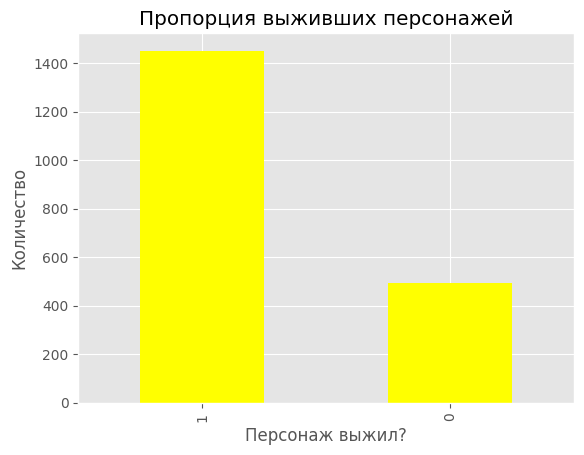

In [45]:
got['isalive'].value_counts().plot(kind='bar', color='yellow').set(title='–ü—Ä–æ–ø–æ—Ä—Ü–∏—è –≤—ã–∂–∏–≤—à–∏—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π', xlabel='–ü–µ—Ä—Å–æ–Ω–∞–∂ –≤—ã–∂–∏–ª?', ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ') #—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π


<Axes: xlabel='male'>

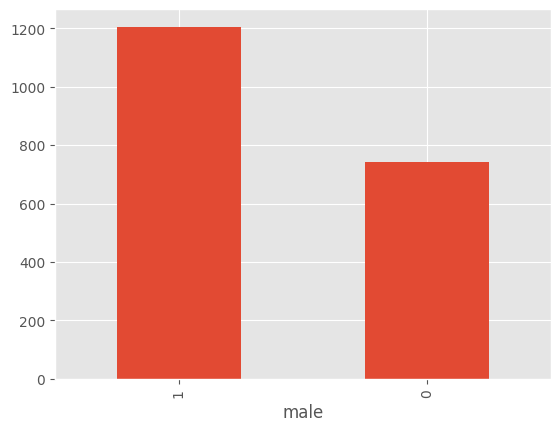

In [46]:
got['male'].value_counts().plot(kind='bar')

[Text(0.5, 1.0, '–ü—Ä–æ–ø–æ—Ä—Ü–∏—è –∑–∞–º—É–∂–Ω–∏—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π'),
 Text(0.5, 0, '–°—É–ø—Ä—É–≥(–∞) —É –ø–µ—Ä—Å–æ–Ω–∞–∂–∞'),
 Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')]

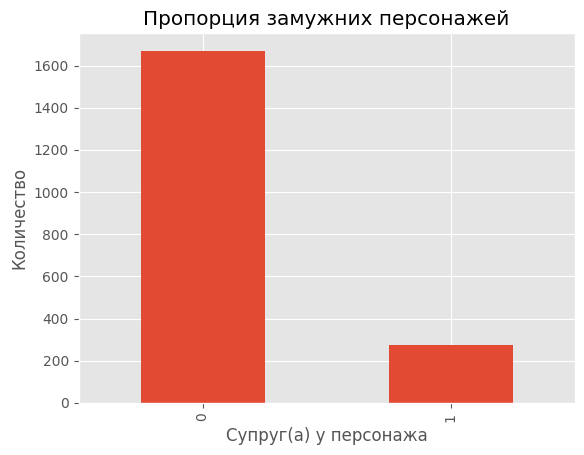

In [47]:
got['ismarried'].value_counts().plot(kind='bar').set(title='–ü—Ä–æ–ø–æ—Ä—Ü–∏—è –∑–∞–º—É–∂–Ω–∏—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π', xlabel='–°—É–ø—Ä—É–≥(–∞) —É –ø–µ—Ä—Å–æ–Ω–∞–∂–∞', ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')


–∫–∞–∫–∞—è-—Ç–æ —Å–º–µ—â–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞, –Ω–æ –ø–æ–ø—Ä–æ–±—É–µ–º –µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å


[Text(0.5, 1.0, '–ü—Ä–æ–ø–æ—Ä—Ü–∏—è —Ç–∏—Ç—É–ª–æ–≤–∞–Ω–Ω—ã—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π'),
 Text(0.5, 0, '–î–≤–æ—Ä—è–Ω—Å–∫–∏–π —Ç–∏—Ç—É–ª –ø–µ—Ä—Å–æ–Ω–∞–∂–∞'),
 Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')]

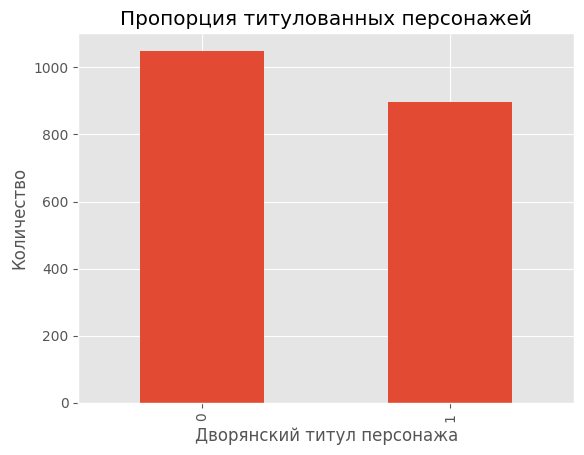

In [48]:
got['isnoble'].value_counts().plot(kind='bar').set(title='–ü—Ä–æ–ø–æ—Ä—Ü–∏—è —Ç–∏—Ç—É–ª–æ–≤–∞–Ω–Ω—ã—Ö –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π', xlabel='–î–≤–æ—Ä—è–Ω—Å–∫–∏–π —Ç–∏—Ç—É–ª –ø–µ—Ä—Å–æ–Ω–∞–∂–∞', ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')


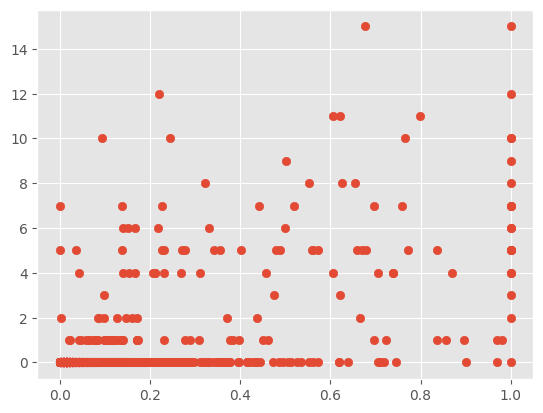

In [49]:
plt.scatter(got['popularity'], got['numdeadrelations'])

–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —á–µ—Ç –Ω–µ –≤–∏–¥–Ω–æ

In [50]:
np.corrcoef(got['popularity'], got['numdeadrelations'])[0, 1]

np.float64(0.6149837839198635)

Text(0, 0.5, 'Fuel efficiency')

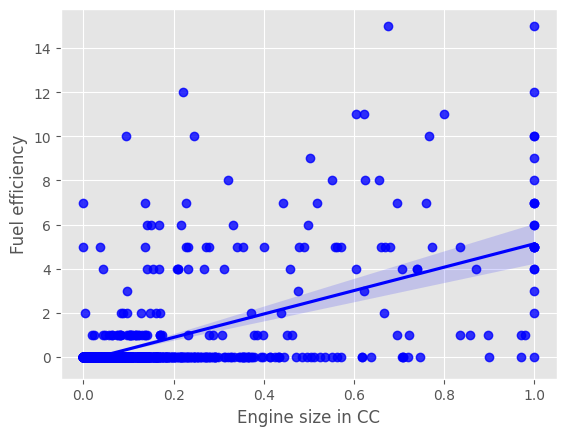

In [51]:
plt.style.use('ggplot') # —Ö–æ—á—É —Ç–∞–∫–æ–π —Å—Ç–∏–ª—å
import seaborn as sns
sns.regplot(
    x='popularity', 
    y='numdeadrelations', 
    data=got,
    color='Blue')
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Fuel efficiency')

In [52]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence

In [53]:
model_1 = sm.GLM(
    got["isalive"],
    got["male"],
    family=families.Binomial(),
).fit()
print(model_1.summary())

# –û—Ä–∏–µ–Ω—Ç–∏—Ä—É–µ–º—Å—è –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è  - Log-Likelihood

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1945
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.3
Date:                Fri, 06 Dec 2024   Deviance:                       2508.6
Time:                        22:23:18   Pearson chi2:                 1.95e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1676
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.8257      0.063     13.190      0.0

In [54]:
model_2 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried"]],
    family=families.Binomial(),
).fit()
print(model_2.summary())

model_3 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations"]],
    family=families.Binomial(),
).fit()
print(model_3.summary())

model_4 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble"]],
    family=families.Binomial(),
).fit()
print(model_4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1944
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.0
Date:                Fri, 06 Dec 2024   Deviance:                       2498.0
Time:                        22:23:18   Pearson chi2:                 1.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1613
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.7780      0.064     12.126      0.0

In [55]:
model_5 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble", "popularity"]],
    family=families.Binomial(),
).fit()
print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1941
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.3
Date:                Fri, 06 Dec 2024   Deviance:                       2410.6
Time:                        22:23:18   Pearson chi2:                 1.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1103
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
male                 0.5746      0.081  

–≤–∏–¥–∏–º, —á—Ç–æ P —É popularity –≤—ã—Å–æ–∫–æ–µ –∏ —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —ç—Ç–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ–∑–Ω–∞—á–∏–º–∞ => –º—ã –º–æ–∂–µ–º –µ–µ –∏—Å–∫–ª—é—á–∏—Ç—å

### –í—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è Log-Likelihood. –ß–µ–º –±–ª–∏–∂–µ —ç—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ –∫ –Ω—É–ª—é —Ç–µ–º –ª—É—á—à–µ –º–æ–¥–µ–ª—å –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ. (model_4) 

In [56]:
model_odds = pd.DataFrame(np.exp(model_4.params), columns= ['Odds Ratio'])
print(model_odds)

                  Odds Ratio
male                1.763928
ismarried           1.496858
numdeadrelations    0.774394
isnoble             1.885640


–î–∞–≤–∞–π—Ç–µ –∏—Ö –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º. –ï—Å–ª–∏ Odds Ratio = 1, —Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—è —à–∞–Ω—Å–æ–≤ —Ä–∞–≤–Ω—ã–µ –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤. –ï—Å–ª–∏ Odds Ratio > 1, —Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—è —à–∞–Ω—Å–æ–≤ –ø—Ä–∏ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤—ã—Ä–∞—Å—Ç–∞–µ—Ç. –ï—Å–ª–∏ Odds Ratio < 1*`, —Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—è —à–∞–Ω—Å–æ–≤ –ø—Ä–∏ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ–Ω–∏–∂–∞–µ—Ç—Å—è.

–ö –ø—Ä–∏–º–µ—Ä—É, –µ—Å–ª–∏ –ø–µ—Ä—Å–æ–Ω–∞–∂ –º—É–∂—á–∏–Ω–∞ ‚Äî –µ–≥–æ —à–∞–Ω—Å –≤—ã–∂–∏—Ç—å –ø–æ–≤—ã—à–∞–µ—Ç—Å—è –Ω–∞ 77,6%. –í—Å–µ, —á—Ç–æ –∏–¥–µ—Ç –ø–æ—Å–ª–µ 1 –≤ Odds Ratio –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –ø—Ä–æ—Ü–µ–Ω—Ç—ã.

–î–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞ –∏ –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = got[['male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0              male  1.732705
1         ismarried  1.270200
2  numdeadrelations  1.689705
3           isnoble  1.743861
4        popularity  2.244383


VIF –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –º–µ–Ω–µ–µ –∫–æ–Ω—Å–µ–Ω—Å–Ω–æ–≥–æ 4 –∏–Ω–∞—á–µ —É –Ω–∞—Å –µ—Å—Ç—å –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å

 –î–∏—Å—Ç–∞–Ω—Ü–∏—è –ö—É–∫–∞ - —ç—Ç–æ –º–µ—Ä–∞, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∞—è –æ—Ç–∫–ª–æ–Ω—è—é—â—É—é —Å–∏–ª—É –∫–∞–∂–¥–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
 –ó–Ω–∞—á–µ–Ω–∏–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è –≤–ª–∏—è—Ç–µ–ª—å–Ω—ã–º, –µ—Å–ª–∏ –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ –±–æ–ª—å—à–µ 0.5

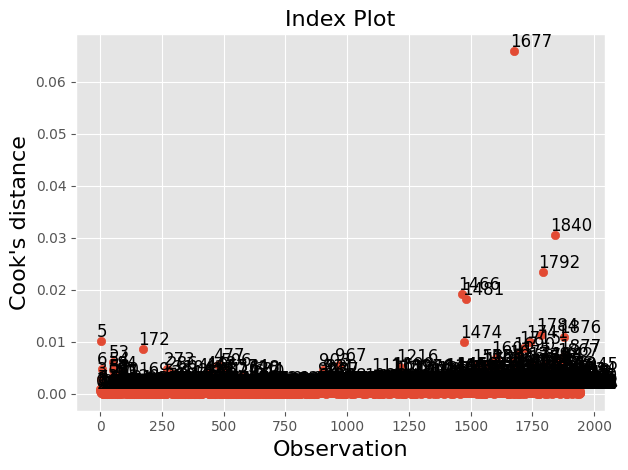

In [58]:
infl = model_5.get_influence()
fig = infl.plot_index(y_var="cooks")
fig.tight_layout()

In [2]:
from scipy import stats
m = stats.bernoulli(p=0.1)
pmf_values = m.pmf(1)
pmf_values


np.float64(0.1)

(0.0, 10.0)

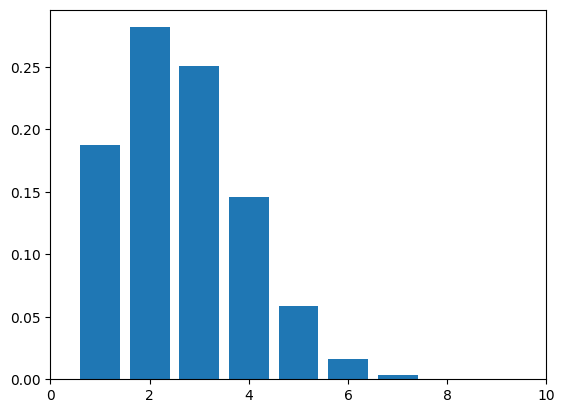

In [17]:
from scipy.stats import binom
n = 10
y = binom(n, p = 0.25)
x = np.arange(1, n)
y = y.pmf(x)
plt.bar(x, y)
# plt.ylim(0, 0.15)
plt.xlim(0, n)




## –†–µ—à–∞—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é 


In [61]:
df = pd.read_csv('loan.csv')
df

Unnamed: 0  Married  Education  LoanAmount  Loan_Status
0             1        1          0       128.0            0
1             2        1          0        66.0            1
2             3        1          1       120.0            1
3             4        0          0       141.0            1
4             5        1          0       267.0            1
..          ...      ...        ...         ...          ...
475         495        1          0       105.0            1
476         496        1          1       107.0            1
477         497        1          0       111.0            1
478         498        1          0        95.0            1
479         499        0          0       209.0            0

[480 rows x 5 columns]

<Axes: xlabel='Loan_Status'>

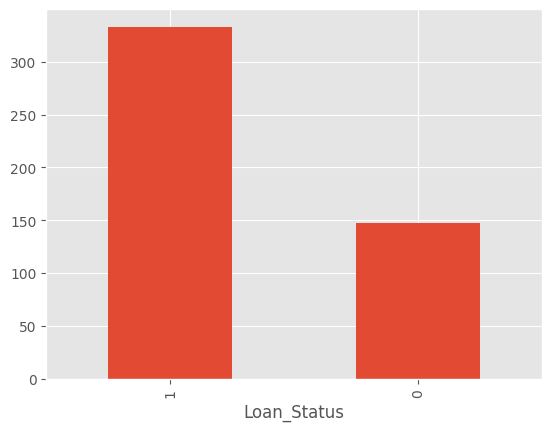

In [62]:
df['Loan_Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Married'>

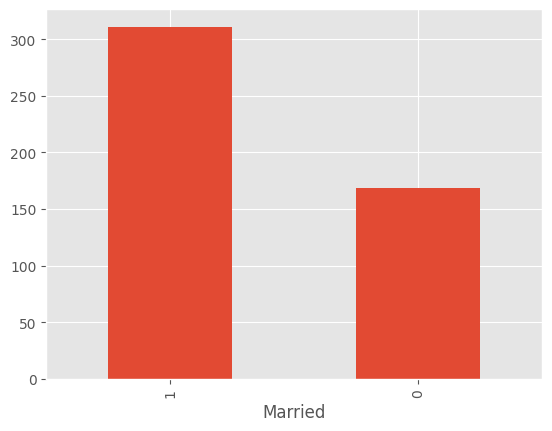

In [63]:
df['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

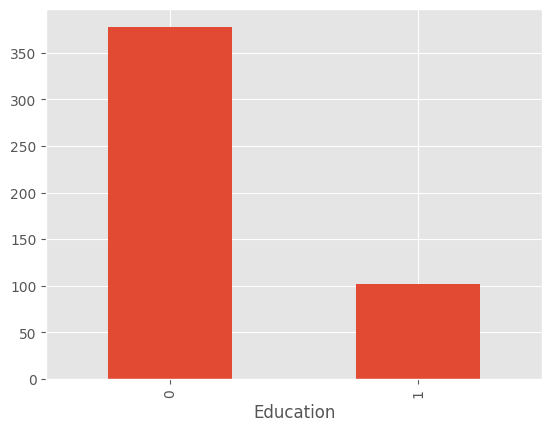

In [64]:
df['Education'].value_counts().plot(kind='bar')

(array([ 74., 262.,  94.,  27.,   9.,   5.,   4.,   1.,   2.,   2.]),
 array([ 17. ,  85.3, 153.6, 221.9, 290.2, 358.5, 426.8, 495.1, 563.4,
        631.7, 700. ]),
 <BarContainer object of 10 artists>)

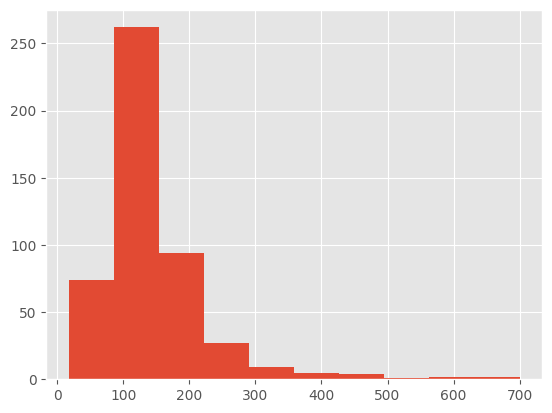

In [65]:
plt.hist(df['LoanAmount'])

–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å –∑–∞–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: 

sm.GLM(–∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –Ω–µ–∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, family=families.Binomial()).fit()

In [66]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
model = sm.GLM(df['Loan_Status'], df['LoanAmount'], family=families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.91
Date:                Fri, 06 Dec 2024   Deviance:                       619.82
Time:                        22:23:24   Pearson chi2:                     495.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.06095
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoanAmount     0.0040      0.001      6.310      0.0

In [67]:
print(np.exp(model.params))

LoanAmount    1.004036
dtype: float64


In [68]:
model = sm.GLM(
    df['Loan_Status'],
    df[['LoanAmount', 'Married', 'Education']],
    family=families.Binomial()
).fit()
print(model.summary())
print(model.summary2())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      477
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.39
Date:                Fri, 06 Dec 2024   Deviance:                       600.79
Time:                        22:23:24   Pearson chi2:                     482.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.01970
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoanAmount     0.0012      0.001      1.362      0.1

–°–æ–∑–¥–∞–π—Ç–µ –æ–±—Ö–µ–∫—Ç X. –ó–∞–ø–∏—à–∏—Ç–µ –≤ –Ω–µ–≥–æ –≤—Å–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–∑ –¥–∞–Ω–Ω—ã—Ö loan.

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å VIF —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é —Å–ª–µ–¥—É—é—â–∏—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π:

–°–æ–∑–¥–∞–µ—Ç—Å—è –ø—É—Å—Ç–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º. `vif_data = pd.DataFrame()`
–í–Ω—É—Ç—Ä–∏ –Ω–µ–≥–æ —Å–æ–∑–¥–∞—é—Ç—Å—è –∫–æ–ª–æ–Ω–∫–∏ —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–º–∏ –≤ –æ–±—ä–µ–∫—Ç–µ `X`. `vif_data["feature"] = X.columns`
–†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å `VIF` —Å –ø–æ–º–æ—â—å—é —Å–ª–µ–¥—É—é—â–µ–π —Ñ—É–Ω–∫—Ü–∏–∏: `vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]`
–í—ã–≤–æ–¥–∏—Ç—Å—è —Ç–∞–±–ª–∏—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `VIF` –ø—Ä–∏ –ø–æ–º–æ—â–∏ –∫–æ–º–∞–Ω–¥—ã `print`.

In [69]:
#–ü—Ä–æ–≤–µ—Ä—è–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['LoanAmount','Married','Education']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


      feature       VIF
0  LoanAmount  2.183028
1     Married  2.294270
2   Education  1.181951


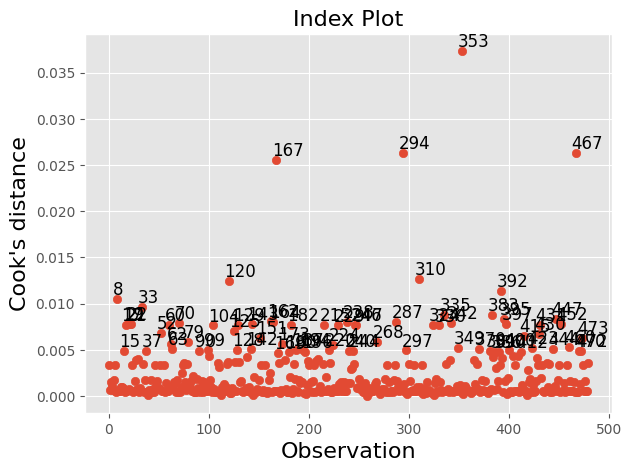

In [70]:
infl = model.get_influence()
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)


ROC-–∫—Ä–∏–≤–∞—è


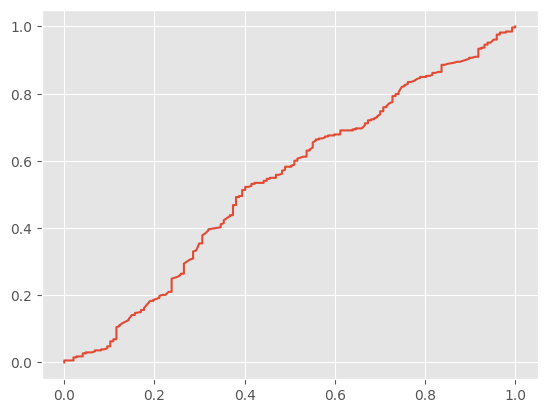

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve
prob_pred = model.predict()
roc_auc_score(df['Loan_Status'], prob_pred)# –∫–∞–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É—é—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º
fpr, tpr, thresholds = roc_curve(pd.to_numeric(df['Loan_Status']), prob_pred) # –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤–µ—Ä–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –≤–µ—Ä–Ω–æ–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª—å—é.
plt.plot(fpr, tpr)


### –¢–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

üîç –°—Ç–æ–ø-—Å–ª–æ–≤–æ ‚Äî –æ–±—ã—á–Ω–æ —ç—Ç–æ —Å–ª—É–∂–µ–±–Ω–∞—è —á–∞—Å—Ç—å —Ä–µ—á–∏, –∫–æ—Ç–æ—Ä–∞—è —É–ø–æ—Ç—Ä–µ–±–ª—è–µ—Ç—Å—è —Ç–∞–∫ —á–∞—Å—Ç–æ, —á—Ç–æ –æ—Ç–¥–µ–ª—å–Ω–æ–µ –µ—ë —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –Ω–µ –≤–Ω–æ—Å–∏—Ç –≤ —Ç–µ–∫—Å—Ç –∫–∞–∫–æ–π-—Ç–æ –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ—Å–æ–±–µ–Ω–Ω—ã–π —Å–º—ã—Å–ª.

üîç –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è ‚Äî —ç—Ç–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –Ω–∞ –µ–¥–∏–Ω–∏—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ —Ö–æ–¥–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

üîç –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è - –∏–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ —Ä–∞–∑–Ω—ã–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Ñ–æ—Ä–º—ã —Å–ª–æ–≤ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π, –∏—Å—Ö–æ–¥–Ω–æ–π —Ñ–æ—Ä–º–µ.

üîç –ò–º–µ–Ω–æ–≤–∞–Ω–Ω—ã–µ —Å—É—â–Ω–æ—Å—Ç–∏ (named entities) ‚Äì —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã —Å—É—â–Ω–æ—Å—Ç–µ–π, —É–ø–æ–º—è–Ω—É—Ç—ã—Ö –≤ —Ç–µ–∫—Å—Ç–µ.

In [72]:
df = pd.read_csv('russian_poetry.csv')
df

author  date_from  \
0       –ú–∏—Ö–∞–∏–ª –õ–µ—Ä–º–æ–Ω—Ç–æ–≤     1829.0   
1          –°–µ—Ä–≥–µ–π –ï—Å–µ–Ω–∏–Ω     1917.0   
2        –ò–≥–æ—Ä—å –°–µ–≤–µ—Ä—è–Ω–∏–Ω     1919.0   
3       –ê–Ω–∞—Ç–æ–ª–∏–π –ñ–∏–≥—É–ª–∏–Ω     1963.0   
4        –ù–∏–∫–æ–ª–∞–π –¢–∏—Ö–æ–Ω–æ–≤     1937.0   
...                  ...        ...   
16689    –õ–µ–æ–Ω–∏–¥ –ú–∞—Ä—Ç—ã–Ω–æ–≤     1967.0   
16690   –ì–∞–≤—Ä–∏–ª–∞ –î–µ—Ä–∂–∞–≤–∏–Ω     1798.0   
16691      –§–µ–¥–æ—Ä –°–æ–ª–æ–≥—É–±     1880.0   
16692      –ò–ª—å—è –≠—Ä–µ–Ω–±—É—Ä–≥     1924.0   
16693  –ì–µ–Ω–Ω–∞–¥–∏–π –®–ø–∞–ª–∏–∫–æ–≤        NaN   

                                                    text  \
0      –ó–∞–±—ã–≤—à–∏ –≤–æ–ª–Ω–µ–Ω–∏—è –∂–∏–∑–Ω–∏ –º—è—Ç–µ–∂–Ω–æ–π,\r\n–û–¥–∏–Ω –∂–∏–ª –≤...   
1      –ù–∏–≤—ã —Å–∂–∞—Ç—ã, —Ä–æ—â–∏ –≥–æ–ª—ã,\r\n–û—Ç –≤–æ–¥—ã —Ç—É–º–∞–Ω –∏ —Å—ã—Ä–æ...   
2      –õ—é—á–∏–Ω—å –ø–µ—á–∞–ª—å–Ω–∞—è —á–∏—Ç–∞–ª–∞ –≤–µ—á–µ—Ä–æ–º —Ä—É—á—å–∏—Å—Ç–æ-–≤–∫—Ä–∞–¥...   
3      –ì–ª—ã–±—É –∫–≤–∞—Ä—Ü–∞ —Ä–∞–∑–±–∏–ª–∏ –º–æ–ª–æ—Ç–æ–º,\r\n–ò, –≤–µ—Å–µ–ª—ã–º –æ–≥...   
4      –•–ª—ã–Ω—É–ª –¥–æ–∂–¥—å, –∫–æ–≥–¥–∞ –¥–µ–≤—É—à–∫–∏, –≤—Å—Ç–∞–≤ –≤ —Ö–æ—Ä–æ–≤–æ–¥,\...   
...                                                  ...   
16689  –°–µ–¥–æ\r\n–ö—É—Ä—á–∞–≤—è—Ç—Å—è –æ–±–ª–∞–∫–∞\r\n–ù–∞–¥ —á–µ—Ä–Ω–æ—Ç–æ—é –ø–æ–ª–µ...   
16690  –ë–µ–ª–æ–∫—É—Ä–∞—è –ü–∞—Ä–∞—à–∞,\r\n–°—Ä–µ–±—Ä–æ—Ä–æ–∑–æ–≤–∞ –ª–∏—Ü–æ–º,\r\n–ö–æ...   
16691  –°–ª–∞–¥–∫–æ–∑–≤—É—á–Ω–∞—è –±–æ–≥–∏–Ω—è,\r\n–†–∏—Ñ–º–∞ –∑–æ–ª–æ—Ç–∞—è,\r\n–°–ª—É...   
16692  –Ø —Ç–∞–∫ –ª—é–±–∏–ª —Ç–µ–±—è ‚Äî –¥–æ –≥—Ä—É–±—ã—Ö —à—É—Ç–æ–∫\r\n–ò –¥–æ —Ç–∞–∫...   
16693  –°. –ê. –®–≤–µ–π—Ü–µ—Ä\r\n—Å –Ω–µ–∂–Ω–æ—Å—Ç—å—é –∏ —É–≤–∞–∂–µ–Ω–∏–µ–º\r\n–ì....   

                                        name  
0         –ó–∞–±—ã–≤—à–∏ –≤–æ–ª–Ω–µ–Ω–∏—è –∂–∏–∑–Ω–∏ –º—è—Ç–µ–∂–Ω–æ–π...  
1                   –ù–∏–≤—ã —Å–∂–∞—Ç—ã, —Ä–æ—â–∏ –≥–æ–ª—ã...  
2                                –ß–ê–†–´ –õ–Æ–ß–ò–ù–¨  
3                                     –ó–æ–ª–æ—Ç–æ  
4                         –•–æ—Ä–æ–≤–æ–¥ –≤ –°—É–ª—å–¥—É—Å–∏  
...                                      ...  
16689                                 –ù–æ—è–±—Ä—å  
16690                                 –ü–∞—Ä–∞—à–µ  
16691                                  –†–∏—Ñ–º–∞  
16692  –Ø —Ç–∞–∫ –ª—é–±–∏–ª —Ç–µ–±—è ‚Äî –¥–æ –≥—Ä—É–±—ã—Ö —à—É—Ç–æ–∫...  
16693                        –°—Ç–∏—Ö–∏ –∫ 8 –º–∞—Ä—Ç–∞  

[16694 rows x 4 columns]

In [73]:
df['text'] = df['text'].replace(r'\s+', ' ', regex=True)

### –≠–∫—Å—Ü–µ—Å—Å

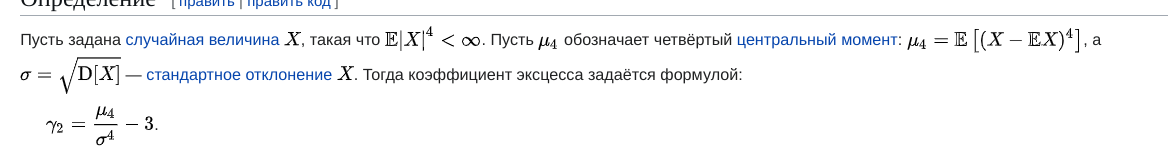

### –ì—Ä–∞—Ñ–∏–∫–∏


In [74]:
memes = pd.read_csv('MEMES_new_short.csv', index_col=0)

In [75]:
memes['Timestamp'] = pd.to_datetime(memes.date_added, utc=True)
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')
memes.loc[memes.origin_year == 'Unknown', 'origin_year'] = None
memes.origin_year.isnull().sum()
usl = memes.origin_year.apply(lambda x: str(x).isdigit())

memes.loc[~usl,'origin_year'] = 0
memes.origin_year = memes.origin_year.astype(int)
memes['average_views'] = memes.views/(memes.days_from_creation + 1)
memes['average_comments'] = memes.comments/(memes.days_from_creation + 1)
pd.get_dummies(memes['status'], drop_first=True).head()
memes_dummy = pd.get_dummies(memes)


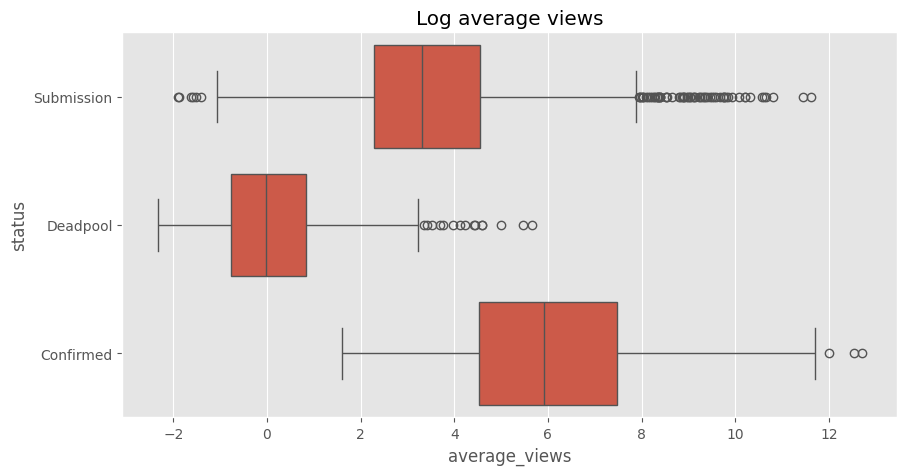

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = np.log(memes.average_views),y = memes.status)
plt.title("Log average views")
plt.show()

–ø—Ä–µ–æ–±—Ä–∞–∑–æ—Ä–≤–∞–Ω–∏–µ x –≤ log(x) - –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –±–æ–∫—Å–∞-–∫–æ–∫—Å–∞


In [77]:
memes['log_average_views'] = np.log(memes.average_views)

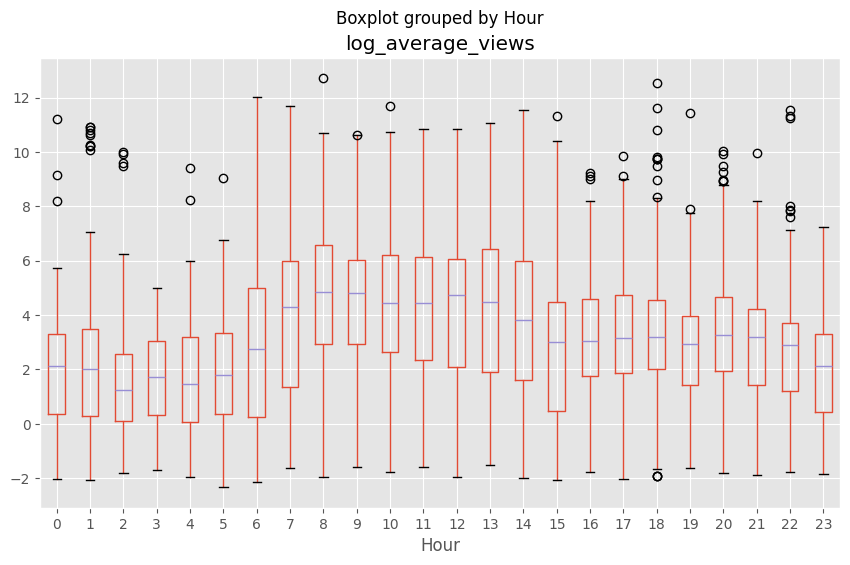

In [78]:
memes.boxplot(column='log_average_views', by='Hour', figsize=(10, 6))
plt.show()

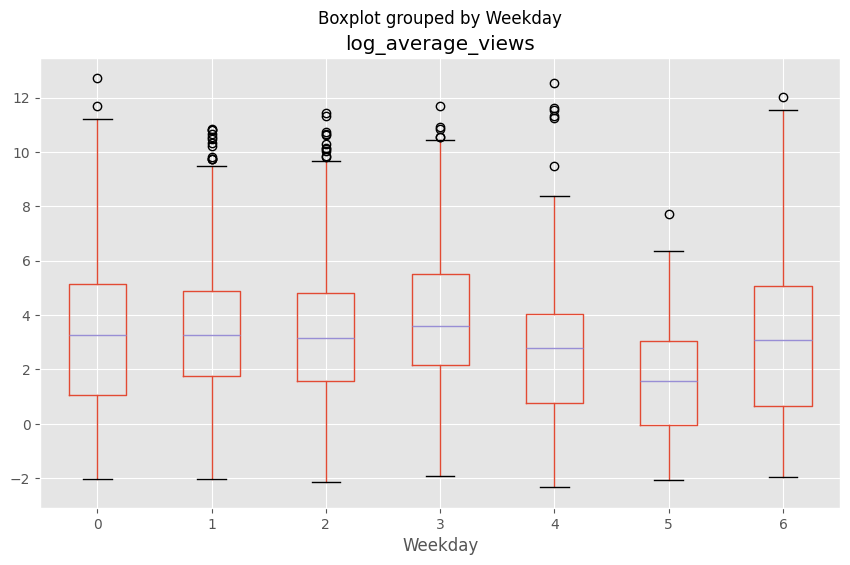

In [79]:
memes.boxplot(column='log_average_views', by='Weekday', figsize=(10, 6))
plt.show()

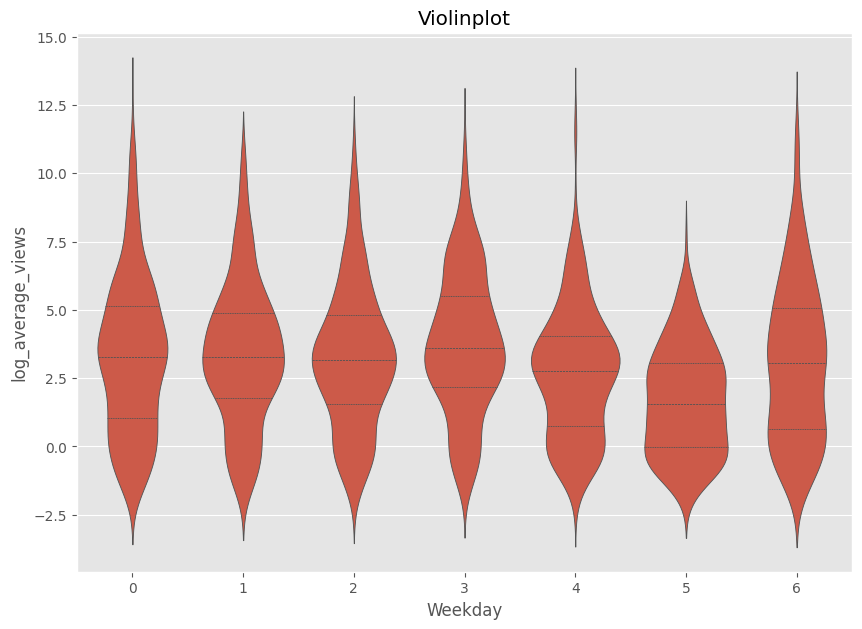

In [80]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Weekday', y='log_average_views', data=memes, inner="quartile")
plt.title("Violinplot")
plt.show()

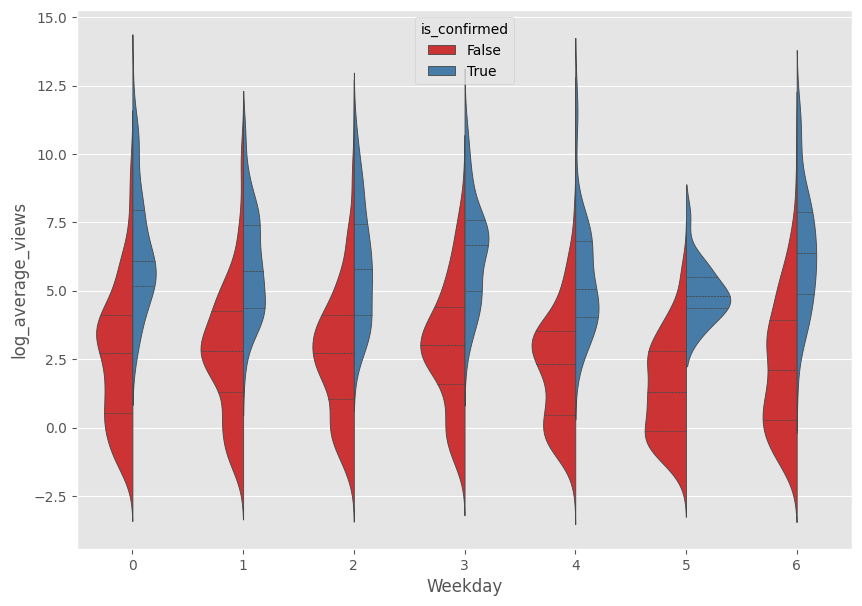

In [81]:
plt.figure(figsize=(10, 7))

memes['is_confirmed'] = memes.status=='Confirmed'

sns.violinplot(x="Weekday", 
                   y="log_average_views", 
                   hue='is_confirmed', 
                   data=memes, 
                   split=True, 
                   palette='Set1', 
                   inner='quartile')
plt.show()

In [82]:
numeric_memes = memes.select_dtypes(include=[np.number])
#–æ—á —Ç–æ–ª–∫–æ–≤–∞—è  —à—Ç—É–∫–∞

/home/nomad/Downloads/mainpy/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


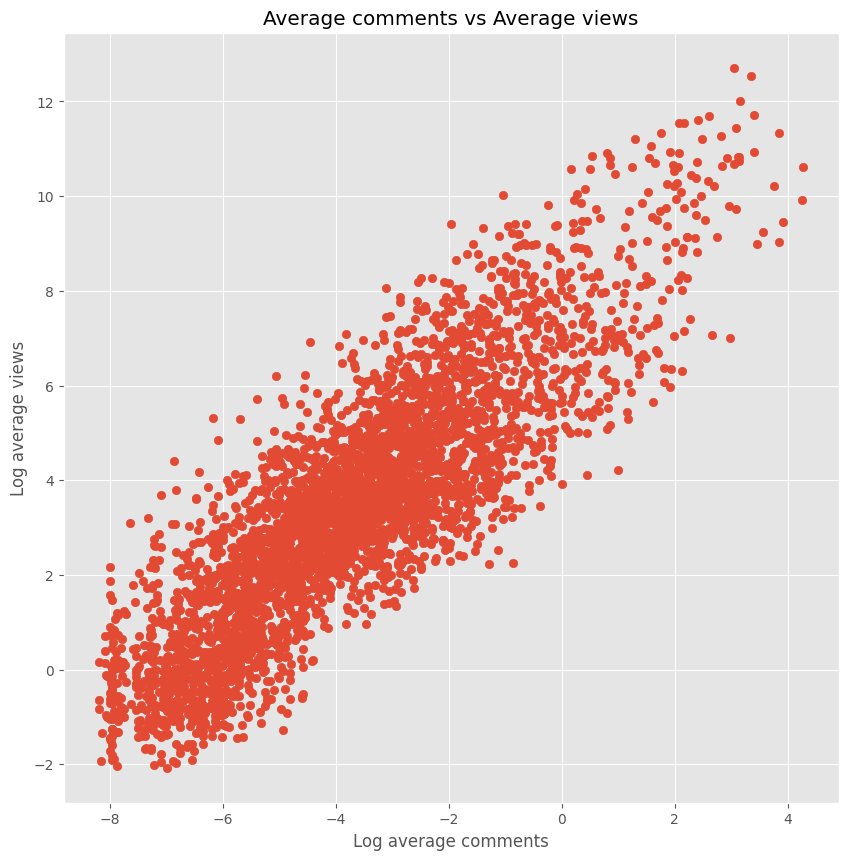

In [83]:
plt.figure(figsize=(10, 10))
plt.scatter(x = np.log(numeric_memes.average_comments),y = np.log(numeric_memes.average_views))
plt.title("Average comments vs Average views")
plt.ylabel("Log average views")
plt.xlabel("Log average comments")
plt.show()

<Axes: >

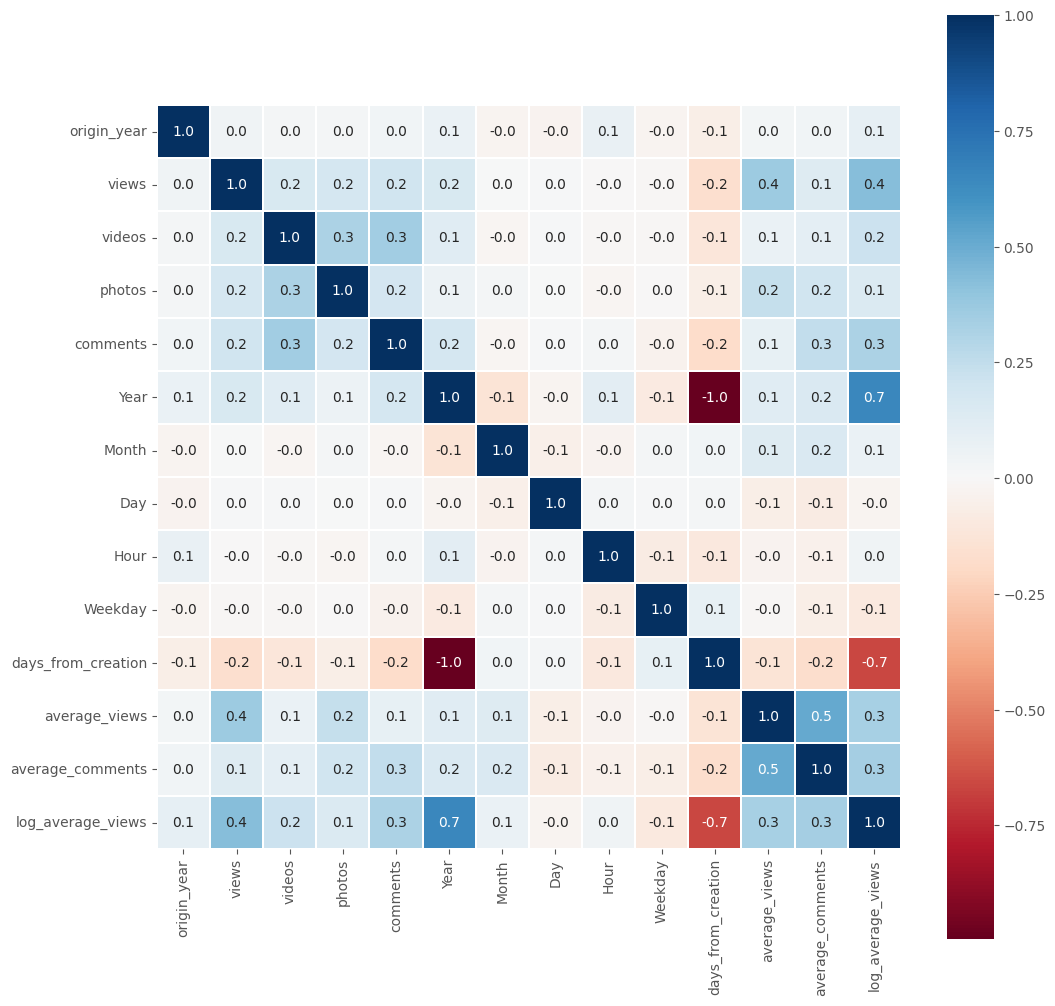

In [84]:
plt.subplots(figsize=(12, 12))

sns.heatmap(numeric_memes.corr( ),
            square=True,
            annot=True, # –ø–æ–¥–ø–∏—Å—å –Ω–∞ –∫–≤–∞–¥—Ä–∞—Ç–∞—Ö
            fmt=".1f",
            linewidths=0.1,
            cmap="RdBu")
# –≤–∞–∂–Ω–æ –≤—Å–µ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —á–∏—Å–ª–∞–º

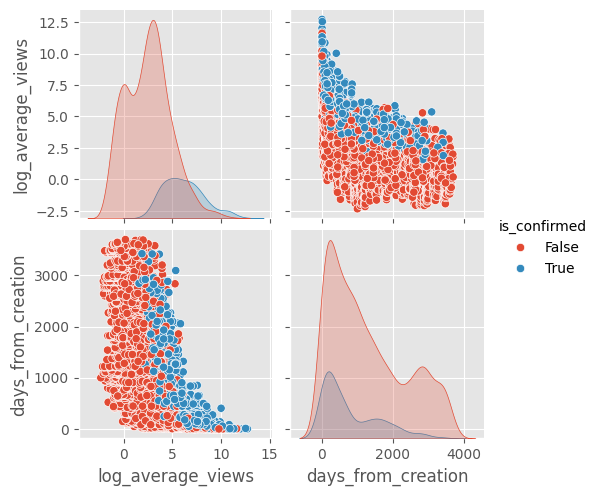

In [85]:
sns.pairplot(
    memes, 
    vars=['log_average_views', 'days_from_creation'],
    hue='is_confirmed'
)

In [86]:
# –≤–æ—Ç —Ç–∞–∫ –º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Å—Ç–∏–ª—å –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.style.use('ggplot')

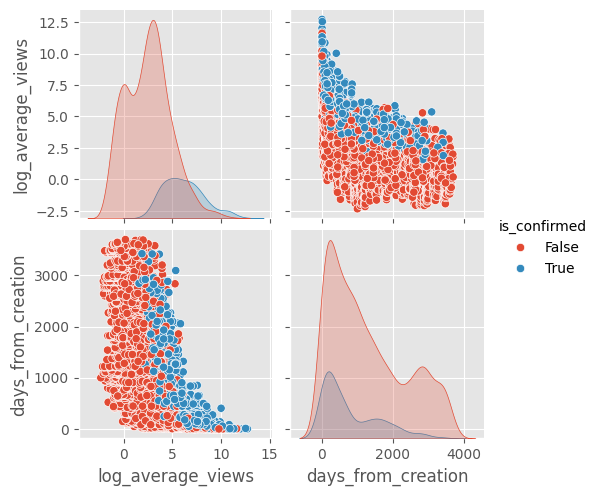

In [87]:
sns.pairplot(
    memes, 
    vars=['log_average_views', 'days_from_creation'],
    hue='is_confirmed'
)

/tmp/ipykernel_107298/672363015.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('google_log.csv', sep='\t')


Text(0.5, 0, '–õ–æ–≥–∞—Ä–∏—Ñ–º –≤—ã—Ä—É—á–∫–∏')

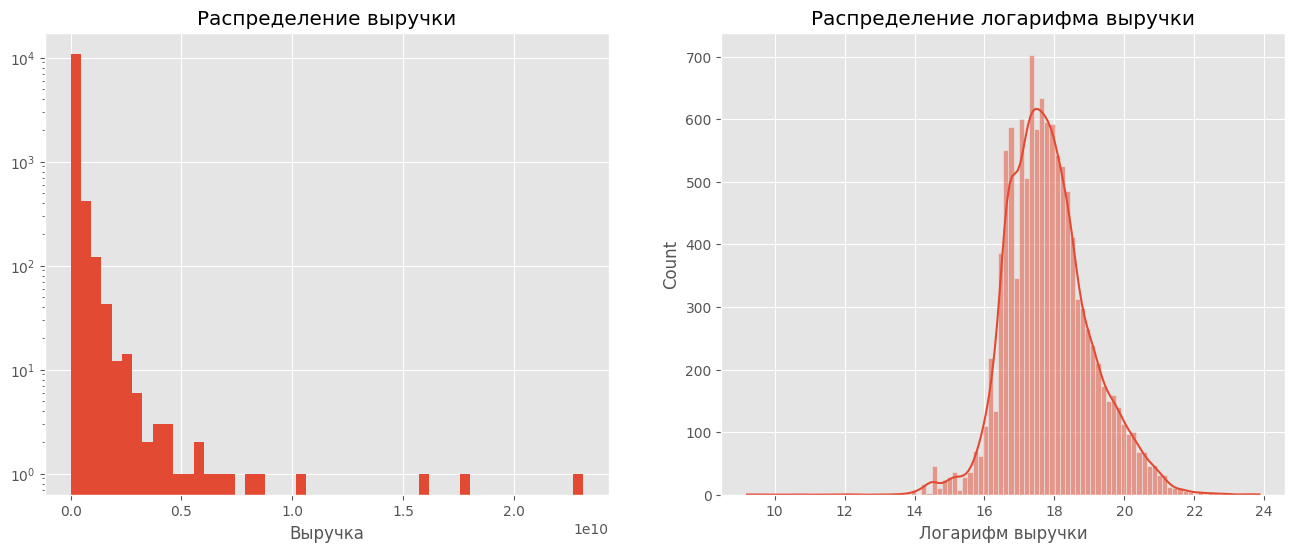

In [88]:
df = pd.read_csv('google_log.csv', sep='\t')
df_buy = df.dropna(subset=['totals.transactionRevenue'])
fig, axes = plt.subplots(1, 2, figsize=(16,6))

df_buy['totals.transactionRevenue'].hist(bins=50, log=True, ax=axes[0])
sns.histplot(
    np.log(df_buy['totals.transactionRevenue'] + 1), 
    ax=axes[1], 
    bins=100, 
    kde=True)

axes[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã—Ä—É—á–∫–∏")
axes[0].set_xlabel("–í—ã—Ä—É—á–∫–∞")

axes[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –≤—ã—Ä—É—á–∫–∏")
axes[1].set_xlabel("–õ–æ–≥–∞—Ä–∏—Ñ–º –≤—ã—Ä—É—á–∫–∏")


<Axes: xlabel='month', ylabel='first_buy_month'>

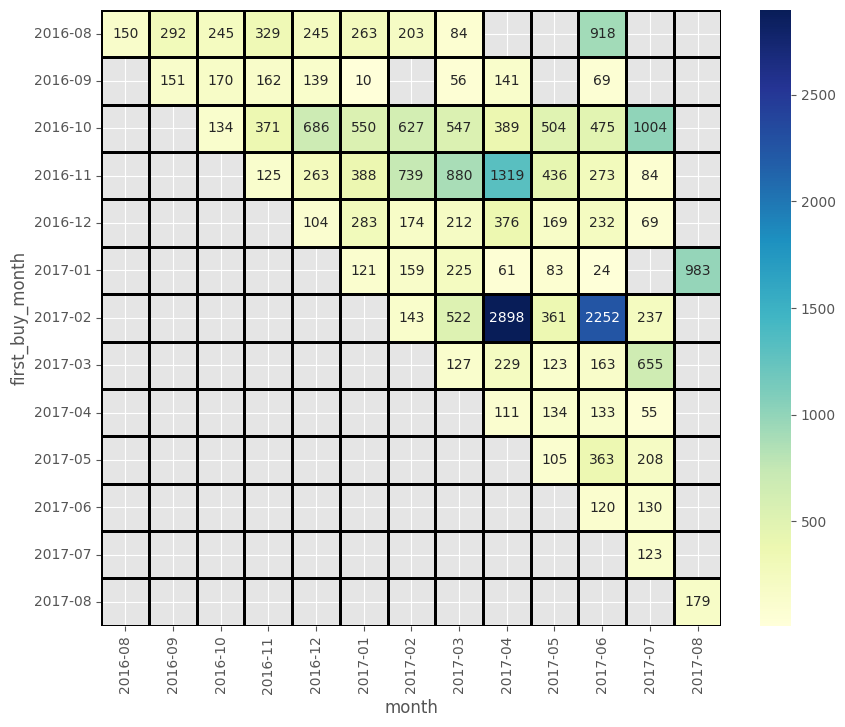

In [89]:
from datetime import datetime
df['totals.transactionRevenue'] = df['totals.transactionRevenue']/10**6 
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

df['month'] = df['date'].apply(lambda w: w.strftime('%Y-%m'))
df['ts'] = df['visitStartTime'].apply(lambda x: 
                                      datetime.fromtimestamp(x))
df_buy = df.dropna(subset=['totals.transactionRevenue'])
first_day_buy = (
    df_buy.groupby('fullVisitorId')
    .agg({
        'month':'min',
        'date': 'min',
        'ts': 'min'
    })
)
first_day_buy.columns = ['first_buy_month', 'first_buy_day', 'first_buy_ts']

df_buy = df_buy.join(first_day_buy, on='fullVisitorId')

sales_sum = df_buy.pivot_table(
    index='first_buy_month',
    columns='month',
    values = 'totals.transactionRevenue',
    aggfunc='sum'
)
sales = df_buy.pivot_table(
    index='first_buy_month',
    columns='month',
    values = 'fullVisitorId',
    aggfunc='nunique'
)


plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_sum/sales,
    annot=True,
    fmt='.0f',
    linewidths=1, 
    linecolor='black', 
    cmap="YlGnBu"
)

<Axes: xlabel='count', ylabel='device.deviceCategory'>

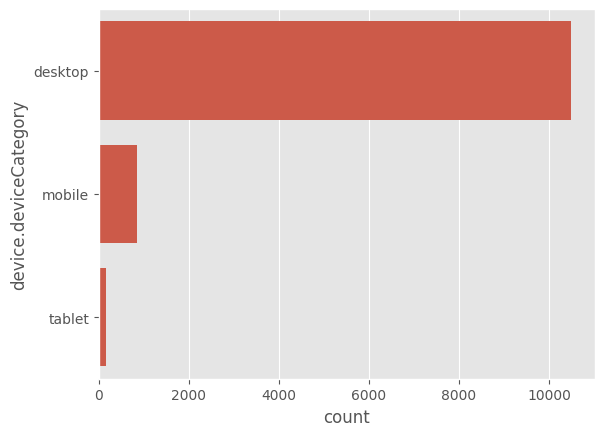

In [90]:
sns.countplot(df_buy["device.deviceCategory"])

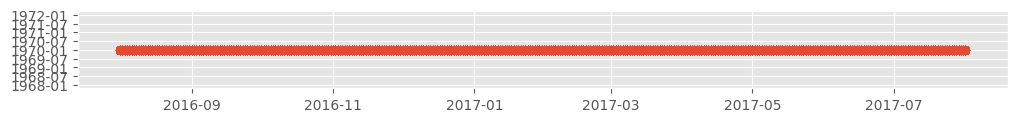

In [91]:
plt.figure(figsize=(12, 1))
plt.scatter(df['date'], np.zeros_like(df['date']))

### –ó–ë–ß –¶–ü–¢

- $
X \; \char`~  \; N(\mu, \sigma ^2)$ \
–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å  $E(X) = \mu$ –∏ $D(X) = \sigma ^ 2 $
- $ X_1, X_2 \dots X_n \sim \; idd(N(0, 1)) -> Y = X_1 ^2 + X_2 ^2 + \dots + X_n ^2 \sim \chi_n ^2$ - —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å n —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã 
E(X) = n, \; Var(X) = 2*n  
- –ß–∏—Å–ª–æ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–∞—Ä—å–∏—Ä–æ–≤–∞–Ω–∏—è–º, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–µ –∏–∑–º–µ–Ω—è—é—â–∏–µ –∑–∞–¥–∞–Ω–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫.

- $X_0 \sim N(0, 1),\: Y \sim \chi_k ^2$ —Ç–æ–≥–¥–∞ –°–õ
$ Z = {\frac{X_0}{\sqrt(Y/k)}} \; \sim \; t(k)$ - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞ —Å $k-1$ —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã
$E(Z) = 0 \\ Var(Z) = \frac{k}{k - 2} $
- $X \sim \chi_k ^2, Y \sim \chi_m ^2 \\ Z = \frac{\sqrt(X/k)}{\sqrt(Y/m)} \sim F(k, m)$ - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –§–∏—à–µ—Ä–∞ —Å k, n —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã \
$ E(X) = \frac{m}{m-2} \\ Var(X) = \frac{2m^2(k+m-2)}{n(m-2)^2(m-4)}$

#### –°–ª–∞–±–∞—è —Ñ–æ—Ä–º–∞ –ó–ë–ß (–ß–µ–±—ã—à–µ–≤) 
__–¢–µ–æ—Ä–µ–º–∞__:
$ –ü—É—Å—Ç—å \;\; X_1, \ldots X_n \;$  –ø–æ–ø–∞—Ä–Ω–æ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã –∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã —Å –∫–æ–Ω–µ—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π $Vax(X_1) < \infty $ —Ç–æ–≥–¥–∞ 
$$ 
\bar{X} \; =\; \frac{X_1 + \dots +X_n}{n} \stackrel{p}{\to} E(X_1) 
$$
—Å—Ä–µ–¥–Ω–µ–µ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫ –º–∞—Ç.–æ–∂–∏–¥ –ø—Ä–∏ $n {\Longrightarrow} \infty$

### C—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏.
–ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –°–í  $X_1, \dots X_n, \dots $ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫ –°–í $X$, –µ—Å–ª–∏
$$\forall \epsilon > 0 \;  P(|X_n - X| < \epsilon) \; \to 0 \; –ø—Ä–∏\;n \to  \;\infty $$
To –µ—Å—Ç—å:
$$\lim_{n\to\infty} P(|X_n - X| < \epsilon) = 1$$
–æ–±—ã—á–Ω–æ: $X_n \stackrel{p}{\to} X$

# –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –ø—Ä–µ–¥–µ–ª—å–Ω–∞—è —Ç–µ–æ—Ä–µ–º–∞


#### –¶–ü–¢

–ü—É—Å—Ç—å $X_1, \ldots, X_n$ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã, –∏–º–µ—é—â–∏–µ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –∫–æ–Ω–µ—á–Ω—ã–º–∏ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –æ–∂–∏–¥–∞–Ω–∏–µ–º –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π. –û–±—ã—á–Ω–æ —ç—Ç–æ—Ç —Ñ–∞–∫—Ç –∑–∞–ø–∏—Å—ã–≤–∞—é—Ç –≤–æ—Ç —Ç–∞–∫:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

—Ç–æ–≥–¥–∞ –ø—Ä–∏ $n \to \infty$ –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \overset{d}{\to} N(0,1)
$$


__–ü—Ä–æ—Å—Ç—ã–º —è–∑—ã–∫–æ–º:__ 

* –ü—Ä–∏ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö —Å—É–º–º–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É 
* __–ì–ª–∞–≤–Ω–æ–µ,__ —á—Ç–æ–±—ã —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã –±—ã–ª–∏ –ø–æ—Ö–æ–∂–∏ –∏ –Ω–µ –±—ã–ª–æ —Ç–∞–∫–æ–≥–æ, —á—Ç–æ –æ–¥–Ω–∞ —Ä–µ–∑–∫–æ –≤—ã–¥–µ–ª—è–µ—Ç—Å—è –Ω–∞ —Ñ–æ–Ω–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö 


### –°—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é (—Å–ª–∞–±–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å)
–ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –°–í $X_1, \dots, X_n, \dots$ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –∫ –°–õ $X$, –µ—Å–ª–∏ 
$$\lim_{n\to\infty} F_{X_n}(x) = F_X (x)$$
—Ç–æ –µ—Å—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F_{X_n}(x)$ —Å—Ö–æ–¥–∏—Ç—Å—è –∫ —Ñ—É–Ω–∫—Ü–∏–∏ $F_{X}(x)$ –≤–æ –≤—Å–µ—Ö —Ç–æ—á–∫–∞—Ö x, –≥–¥–µ F_{X} (x) –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞

### –°—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ—á—Ç–∏ –Ω–∞–≤–µ—Ä–Ω–æ–µ (—Å–∞–º–∞—è —Å–∏–ª—å–Ω–∞—è)
$$X_n \overset{–ø.–Ω}{\to} X$$
–ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –°–í $X_1, \dots, X_n, \dots$ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ—á—Ç–∏ –Ω–∞–≤–µ—Ä–Ω–æ–µ (—Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –µ–¥–∏–Ω–∏—Ü–∞) –∫ –°–õ X, –µ—Å–ª–∏ $$P(\lim_{n\to\infty}X_n = X) = 1$$ —Ç–æ –µ—Å—Ç—å —É –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –µ—Å—Ç—å –ø—Ä–µ–¥–µ–ª —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 1

### –°–∏–ª—å–Ω–∞—è —Ñ–æ—Ä–º–∞ –ó–ë–ß (–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤)
__–¢–µ–æ—Ä–µ–º–∞__: 
–ü—É—Å—Ç—å $X_1, \dots. X_n$ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –°–õ —Å $E(|(X_1)|) < \infty$, —Ç–æ–≥–¥–∞: $$\bar{X} = \frac{X_1 + \dots + X_n}{n} \overset{–ø.–Ω}{\to} E(X_1)$$ –°—Ä–µ–¥–Ω–µ–µ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ—á—Ç–∏ –Ω–∞–≤–µ—Ä–Ω–æ–µ –∫ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º—É –æ–∂–∏–¥–∞–Ω–∏—é –ø—Ä–∏ $n \to \infty$ 

### –ö–≤–∞–Ω—Ç–∏–ª—å–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
__–¢–µ–æ—Ä–º–µ—Ä–∞__:
–ü—É—Å—Ç—å —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F_x (x)$ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞, —Ç–æ–≥–¥–∞ –°–í $Y =F(x)$ –∏–º–µ–µ—Ç —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[0; 1]$
__–î–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ__:
$ F_y(y) = P(Y \leq y) = P(F(X) \leq y) = P(X \leq F^{-1}(y)) = F(F^{-1}( y)) = y $ \
 –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F_y (y) = y$, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[0; 1]$ 

#### –°–ª–µ–¥—Å—Ç–≤–∏–µ:

–ü—É—Å—Ç—å $Y \sim U[0;1]$, –∞ $F(x)$ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–æ–≥–¥–∞ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ $X = F^{-1}(Y)$ –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$.

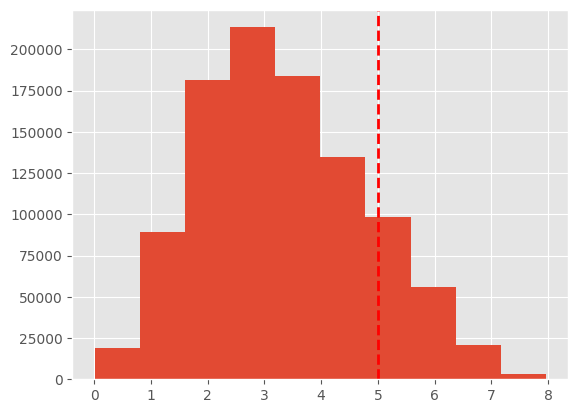

In [92]:
from scipy import stats
import matplotlib.pyplot as plt
n_obs = 10**6

# –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –≤ —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –∑–∞–¥–∞–µ—Ç—Å—è –ª–µ–≤–∞—è –≥—Ä–∞–Ω–∏—Ü–∞ –∏ –¥–ª–∏–Ω–∞
# –∞ –Ω–µ –ª–µ–≤–∞—è –∏ –ø—Ä–∞–≤–∞—è –≥—Ä–∞–Ω–∏—Ü—ã
uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5
success.mean()
plt.hist(x_1 + x_2 + x_3**2)
plt.axvline(x=5, color='red', linestyle='--', linewidth=2, label='–í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –ø—Ä—è–º–∞—è')

In [16]:
from scipy import stats
a = stats.binom(n = 10, p=0.25)

–ö–æ–≥–¥–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –≥–æ—Ç–æ–≤, —É –Ω–µ–≥–æ –º–æ–∂–Ω–æ –≤—ã–∑—ã–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –º–µ—Ç–æ–¥—ã: 

* `rvs` —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –Ω–∞–º –≤—ã–±–æ—Ä–∫—É –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ä—ë–º–∞ `size`
* `cdf` –≤—ã—á–∏—Å–ª–∏—Ç –¥–ª—è –Ω–∞—Å –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (cumulative distribution function) –≤ —É–∫–∞–∑–∞–Ω–Ω–æ–π —Ç–æ—á–∫–µ
* `pdf` –≤—ã—á–∏—Å–ª–∏—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–µ–ª–Ω–∏—è (probability density function) –≤ —É–∫–∞–∑–∞–Ω–Ω–æ–π —Ç–æ—á–∫–µ 
* `ppf` –≤—ã—á–∏—Å–ª–∏—Ç –∫–≤–∞–Ω—Ç–∏–ª—å, —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è

[–í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –∏ –¥—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã, –Ω–æ –º—ã —Å –Ω–∏–º–∏ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –±—É–¥–µ–º –≤—Å—Ç—Ä–µ—á–∞—Ç—å—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–∞—à–µ–≥–æ –∫—É—Ä—Å–∞ (—Å–º. —Ä–∞–∑–µ–ª statistical functions).

In [94]:
a.ppf(0.4995 + 0.5)

np.float64(3.2905267314919255)

–ò–∑ –¶–ü–¢ –º–æ–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑ –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ n:$$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$ –ú—ã —Ç–∞–∫ –∂–µ –º–æ–∂–µ–º –æ—Ü–µ–Ω–∏—Ç—å —ç—Ç–æ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–æ–º–µ–Ω—Ç–æ–≤, –ø—Ä–∏—Ä–∞–≤–Ω—è–≤ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –∫ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º, –Ω–æ –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ $\sigma = \hat{\sigma}$ $\newline$ $$\frac{\bar{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{asm}{\sim} N(0, 1)$$


–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$ –±—É–¥–µ—Ç
$$
\hat{x} \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \sigma^2}{n}}
$$

### –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —Ä–∞–∑–Ω–æ—Å—Ç–∏
–ú—ã –∑–Ω–∞–µ–º, —á—Ç–æ $\bar{X} - \bar{Y} \overset{asy}{\sim} N(\mu_x - \mu_y, \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m})$ 
–ø–æ—Ç–æ–º—É
$$
\bar{X} - \bar{Y} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{{\sigma_x^2}}{n} + \frac{{\sigma_y^2}}{m}}
$$

### –î–æ–ª–∏
–í —Å–ª—É—á–∞–µ –¥–æ–ª–µ–π –º—ã –º–æ–∂–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —á—Ç–æ–±—ã –¥–ª–∏–Ω–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–ª–∞ –∑–∞—Ä–∞–Ω–µ–µ –≤—ã–±—Ä–∞–Ω–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω $$\delta = 2 * z_{1-\frac{\alpha}{2}} * \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$$
$$n \leqslant \frac{4 * z^2_{1-\frac{\alpha}{2}* \hat{p}(1 - \hat{p})} }{\delta^2}$$ 
$p * (1 - p)$ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç $0.25$ –∏ —É—á–∏—Ç—ã–≤–∞—è —ç—Ç—É –æ—Ü–µ–Ω–∫—É —Å–≤–µ—Ä—Ö—É –º—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ n $$n = \frac{z^2_{1-\frac{\alpha}{2}}}{\delta^2}$$

–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –¥–ª—è rpu

/tmp/ipykernel_107298/3862912428.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv('marketing_log_1.csv', sep='\t')


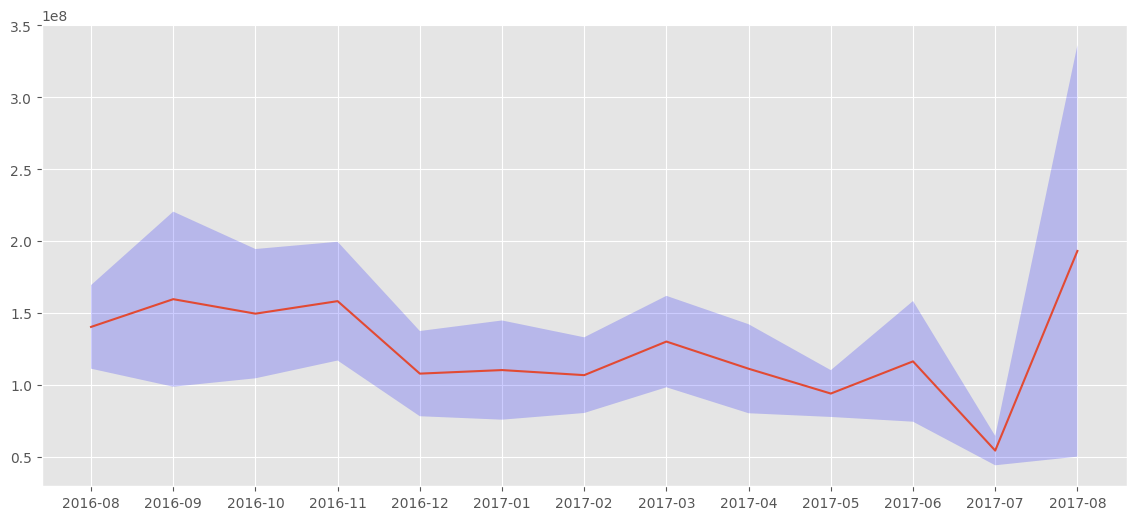

In [97]:
visits = pd.read_csv('marketing_log_1.csv', sep='\t')

# –∏–∑–º–µ–Ω–∏–º —Ç–∏–ø –∫–æ–ª–æ–Ω–∫–∏ —Å –¥–∞—Ç–æ–π –Ω–∞ –≤—Ä–µ–º—è
visits['date'] = pd.to_datetime(visits["date"], format="%Y-%m-%d")
# –±—É–¥–µ–º —Å—Ç—Ä–æ–∏—Ç—å RPU –Ω–∞ –º–µ—Å—è—á–Ω–æ–π –æ—Å–Ω–æ–≤–µ
visits['month'] = visits['date'].apply(lambda w: w.strftime('%Y-%m'))

purchases = visits.dropna(subset=['transactionRevenue'])
purchases.shape

datePurchases = (
    visits.groupby('month')['transactionRevenue']
    .agg([('rpu', 'mean'),
          ('count', 'count'),
          ('se', 'std')])
    .reset_index()
)
alpha = 0.05

# –≥—Ä–∞–Ω–∏—Ü—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
q = stats.norm.ppf(1 - alpha/2)
datePurchases['left'] = datePurchases['rpu'] - q * datePurchases['se']/np.sqrt(datePurchases['count'])
datePurchases['right'] = datePurchases['rpu'] + q * datePurchases['se']/np.sqrt(datePurchases['count'])

datePurchases['rpu'].plot(figsize=(14,6))
plt.fill_between(datePurchases['month'], datePurchases['left'], datePurchases['right'], 
                 facecolor='blue', alpha=0.2, interpolate=True)
plt.show()

–ß–µ—Ä–µ–∑ –ú–ú –º—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å —Ä–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç $\bar X$: $\frac{1}{\bar X}, \; \sqrt{3*\bar{X}}$ –∏ —Ö–æ—Ç–∏–º –ø–æ–Ω—è—Ç—å –∫–∞–∫ $g(x) \overset{asy}{\sim} \:?$ \
__–î–µ–ª—å—Ç–∞ –º–µ—Ç–æ–¥__: \
$X_1, \dots, X_n \sim iid(\mu, \sigma^2)$ \
$g(t) - –¥–∏—Ñ—Ñ.$ —Ç–æ–≥–¥–∞, \
$g(\bar{X}) \overset{asy}{\sim} N(g(\mu), \frac{\sigma^2}{n} * g'(\mu) ^2)$


# –ü–û–°–ú–û–¢–†–ï–¢–¨ –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –§–£–ù–ö–¶–ò–ò –û–¢ –°–õ–£–ß–ê–ô–ù–û–ô –í–ï–õ–ò–ß–ò–ù–´

### –°–≤–æ–π—Å—Ç–≤–∞ –æ—Ü–µ–Ω–æ–∫
1. __–ù–µ—Å–º–µ—â–µ–Ω–Ω–æ—Å—Ç—å__. –û—Ü–µ–Ω–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ–π, –µ—Å–ª–∏ $$E(\hat \theta) = \theta$$ –°–º–µ—â–µ–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏ —ç—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –µ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –æ–∂–∏–¥–∞–Ω–∏–µ–º –∏ –µ–µ —Ä–µ–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º: $$bias(\hat \theta)=E(\hat \theta) - \theta$$ –ò–ª–∏ –ø—Ä–æ—â–µ: –µ—Å–ª–∏ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º n –º—ã –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º –Ω–∞—à—É –æ—Ü–µ–Ω–∫—É, –≤ —Å—Ä–µ–¥–Ω–µ–º –º—ã –Ω–µ –æ—à–∏–±–∞–µ–º—Å—è
2. __–°–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å__. \
–û—Ü–µ–Ω–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è —Å–æ—Å—Ç–æ—è—Ç–µ–ª–Ω–æ–π, –µ—Å–ª–∏ –æ–Ω–∞ —Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫ –∏—Å—Ç–∏–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ø—Ä–∏ $n \overset{p}{\to} \infty$ $$\hat \theta \overset{p}{\to} \theta$$ –ò–ª–∏ –ø—Ä–æ—â–µ: —á–µ–º –±–æ–ª—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Ç–µ–º –±–ª–∏–∂–µ –º—ã –∫ –∏—Å—Ç–∏–Ω–µ
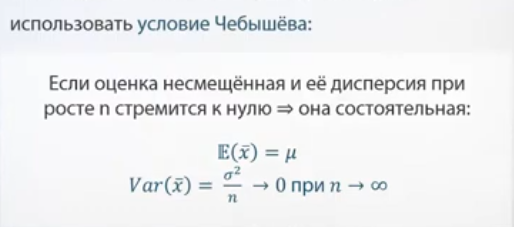
3. __–ê—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∞—è –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ—Å—Ç—å__. \
–û—Ü–µ–Ω–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –∞—Å–∏–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ–π, –µ—Å–ª–∏ –µ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ —Å—Ö–æ–¥–∏—Ç—Å—è –∫ –æ—Ü–µ–Ω–∏–≤–∞–µ–º–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É –ø—Ä–∏ $n \overset{p}{\to} \infty$ $$E(\hat \theta) \to \theta$$

–Ω–µ—Å–º–µ—â—ë–Ω–Ω–æ—Å—Ç—å —ç—Ç–æ —Å–≤–æ–π—Å—Ç–≤–æ –æ—Ü–µ–Ω–∫–∏ –ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $n$. –û–Ω–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ—à–∏–±–∫–∞ "–≤ —Å—Ä–µ–¥–Ω–µ–º", —Ç–æ –µ—Å—Ç—å –ø—Ä–∏ —Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –æ—Ü–µ–Ω–∫–∏, –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –≠—Ç–æ –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–µ–µ —Å–≤–æ–π—Å—Ç–≤–æ, –Ω–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ–µ. –î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, —á—Ç–æ–±—ã —Å–º–µ—â–µ–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏ —É–º–µ–Ω—å—à–∞–ª–æ—Å—å —Å —Ä–æ—Å—Ç–æ–º –æ–±—ä—ë–º–∞ –≤—ã–±–æ—Ä–∫–∏. –¢–∞–∫–∞—è –æ—Ü–µ–Ω–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Å–º–µ—â—ë–Ω–Ω–æ–π. 

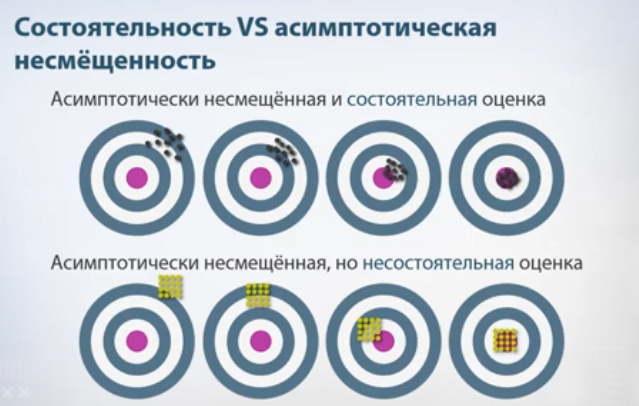

#### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫. 
–û–±—ã—á–Ω–æ –æ—Ü–µ–Ω–∫–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π —Å—Ä–∞–≤–Ω–∏–≤–∞—é—Ç —Å –ø–æ–º–æ—â—å—é –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏: $$MSE = E(\hat \theta - \theta)^2$$ –ï—Å–ª–∏ –Ω–µ —Å–º–µ—â–µ–Ω–Ω–∞—è, —Ç–æ $MSE=Var(\hat \theta)$

__–∫—Ä–∞—Ç–∫–æ__ 
* __–Ω–µ—Å–º–µ—â—ë–Ω–Ω–æ—Å—Ç—å__ (–ø—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ –º—ã –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–µ –æ—à–∏–±–∞–µ–º—Å—è) 
* __—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å__ (–ø—Ä–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–∏ –≤—ã–±–æ—Ä–∫–∏ –º—ã –ø—Ä–∏—Ö–æ–¥–∏–º –∫ –∏—Å—Ç–∏–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é)
* __—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å__ (—É –Ω–∞—à–µ–π –æ—Ü–µ–Ω–∫–∏ —Å–∞–º–∞—è –º–∞–ª–µ–Ω—å–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è –¥–ª—è –µ—ë –∫–ª–∞—Å—Å–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –≤—Å–µ—Ö –Ω–µ—Å–º–µ—â–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫))

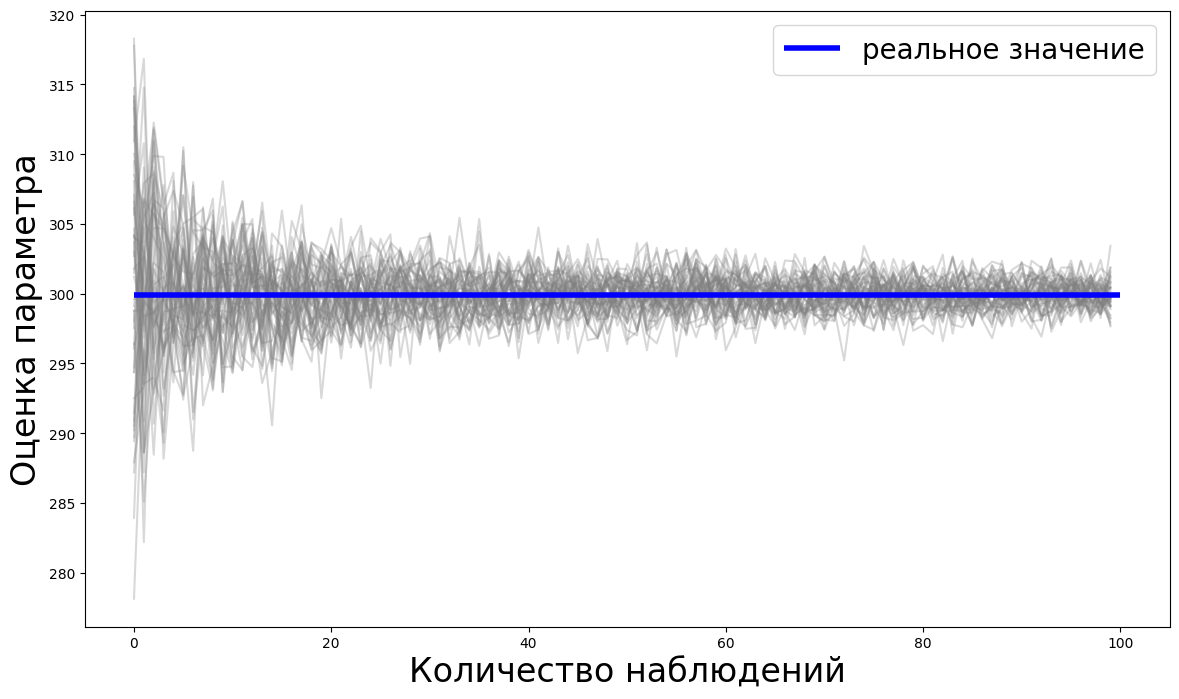

In [19]:
norm_rv = stats.norm(loc=300, scale=100)

# –≤—Å—è –≥–µ–Ω–µ—Ä–∞–ª—å–Ω–∞—è —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç—å 
x_mamont = norm_rv.rvs(size = 10**6)

theta_real = np.mean(x_mamont) # –Ω–∞—Å—Ç–æ—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ
theta_real

theta_hat = np.zeros((100, 50))

for n in range(100, 10100, 100): # –ø–æ–¥–Ω–∏–º–∞–µ–º—Å—è –≤—ã—à–µ –∏ –≤–∏–¥–∏–º –±–æ–ª—å—à–µ –º–∞–º–æ–Ω—Ç–æ–≤
    
    # 50 –≤—ã–±–æ—Ä–æ–∫ —Å –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è–º–∏ –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 —Ä–∞–∑–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat[n//100 - 1] = x_mean                # —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è
    # theta_hat[n//100 - 1] = (x_mean - 4200/n)     # —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è
    # theta_hat[n//100 - 1] = (x_mean - 5*(n+1)/n)   # –Ω–µ—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è 
    
    
plt.figure(figsize=(14,8))
plt.plot(theta_hat, c='grey', alpha = 0.3)

plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π', size=24)
plt.ylabel('–û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞', size=24)

plt.hlines(theta_real, 0, 100, color='blue', lw=4, label='—Ä–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.legend(fontsize=20);    

#### –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å 

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –¥–≤–µ –æ—Ü–µ–Ω–∫–∏. –û–Ω–∏ –æ–±–µ –∫–ª–∞—Å—Å–Ω—ã–µ, –Ω–µ—Å–º–µ—â—ë–Ω–Ω—ã–µ –∏ —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–µ. –í–æ–∑–Ω–∏–∫–∞–µ—Ç –≤–æ–ø—Ä–æ—Å: –∞ –∫–∞–∫—É—é –≤–∑—è—Ç—å —Ç–æ? –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤—ã–±—Ä–∞—Ç—å, –≤–≤–æ–¥—è—Ç —Å–≤–æ–π—Å—Ç–≤–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. 

__–û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:__ –û—Ü–µ–Ω–∫–∞ $\hat \theta$ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\theta$ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è __—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º –∫–ª–∞—Å—Å–µ –æ—Ü–µ–Ω–æ–∫,__ –µ—Å–ª–∏ –µ—ë –¥–∏—Å–ø–µ—Ä—Å–∏—è, $Var(\hat \theta)$ –≤ —ç—Ç–æ–º –∫–ª–∞—Å—Å–µ –æ—Ü–µ–Ω–æ–∫, –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω–æ–º –æ–±—ä—ë–º–µ –≤—ã–±–æ—Ä–∫–µ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞. 

–ó–∞—á–µ–º —ç—Ç–æ –Ω—É–∂–Ω–æ? –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –æ—Ü–µ–Ω–æ–∫ –±—ã–ª–∏ –∫–∞–∫ –º–æ–∂–Ω–æ —É–∂–µ, —Ç–æ –µ—Å—Ç—å –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∫–∞ –±—ã–ª–∞ –∫–∞–∫ –º–æ–∂–Ω–æ —Ç–æ—á–Ω–µ–µ.

$X_1, \dots, X_n \sim iid(\mu, \sigma^2)$ \

–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —ç—Ç–æ –Ω–µ–ø–ª–æ—Ö–∏–µ –æ—Ü–µ–Ω–∫–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π:
* $\hat \mu = \bar x$
* $\hat \sigma ^2 = \frac{\sum(x_i - \bar x)^2}{n}$ \
`–Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ—Å—Ç—å - ?` 
- $E(\bar x) = E(\frac{x_1, + \dots + x_n}{n}) = \frac{E(x_1) + \dots + E(x_n)}{n} = \frac{n * \mu}{n} = \mu$-`–Ω–µ—Å–º–µ—â–µ–Ω–∞—è` 
- $E(\hat \sigma ^2) = E(\bar{x^2}) - E(\bar x^2)$\
$E(\bar{x^2}) = E(\frac{x_1 ^2 + \dots + x_n ^2}{n}) = \frac{E(x_i ^2) * n}{n} = E(x_i ^2)$ \
$E(\bar x^2) = E((\frac{x_1, + \dots + x_n}{n})^2) = \frac{E(x_1 + \dots + x_n)^2}{n^2} = \frac{n * E(x_i ^2) + 2*\sum{x_i*x_j, (i!=j) }}{n^2} =  \frac{ E(x_i ^2) + 2* \frac{n*(n-1)}{2} * \mu ^2}{n} = \frac{ E(x_i ^2) + (n-1) * \mu ^2}{n}$ \
$E(\hat \sigma ^2) = E({x_i ^2}) - \frac{ E(x_i ^2) - (n-1) * \mu ^2}{n} = \frac{n - 1}{n} * (E(x_i ^2) - E^2 (x_i))$ \
$= \frac{n - 1}{n} * Var(x_i)$ -`—Å–º–µ—â–µ–Ω–∞` \
__–ù–û!__ $\frac{n}{n-1} * \hat \sigma ^2 = S^2$ - `–Ω–µ —Å–º–µ—â–µ–Ω–∞`

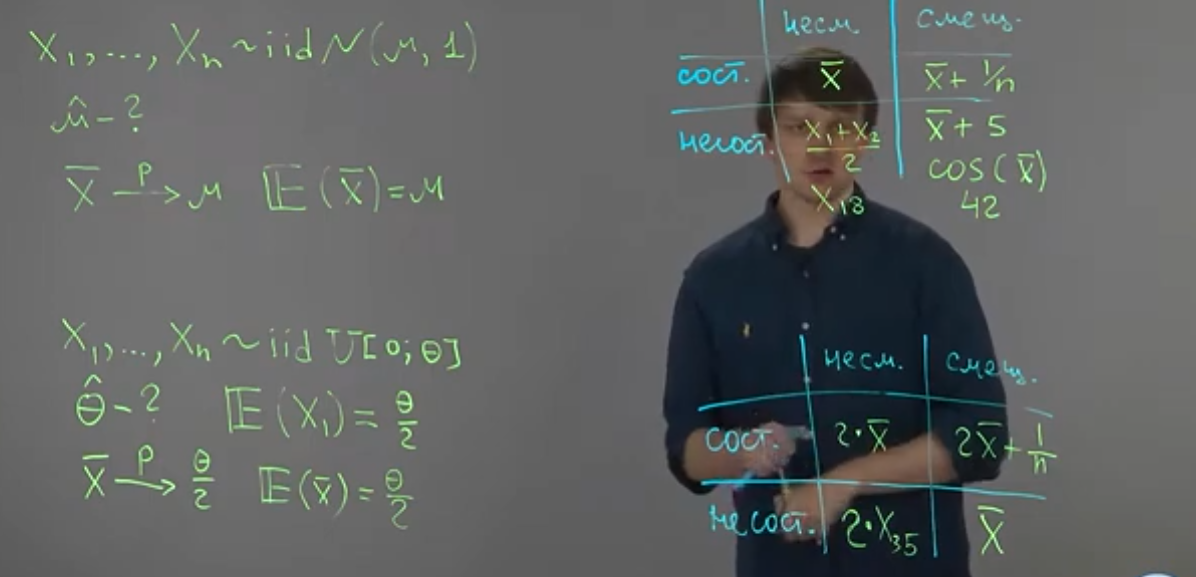

__–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫__
* `MSE`. –î–ª—è –Ω–µ–º–µ—â–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π –æ—Ü–µ–Ω–∫–∏. –ß–µ–º –±–æ–ª–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–∞ –æ—Ü–µ–Ω–∫–∞, —Ç–µ–º —Ç–æ—á–Ω–µ–µ –ø—Ä–æ–≥–Ω–æ–∑ (–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª). –ú—ã –º–æ–∂–µ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –≤ –≤–∏–¥–µ —Å—É–º–º—ã —Å–º–µ—â–µ–Ω–∏—è –∏ —Ä–∞–∑–±—Ä–æ—Å–∞. Bias-variance decomposition 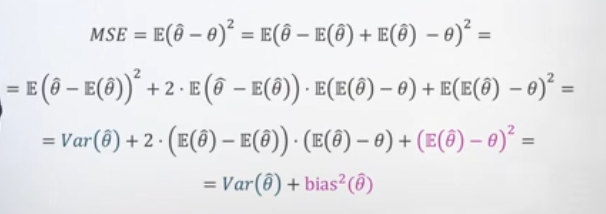

__–†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è__ \
$Y_1, Y_2, Y_3 \sim iid(\mu, \sigma^2)$ \
$\hat{Y_4} - ?. \; \; \hat{\mu} = \gamma * (y_1 +y_2 + y_3)$ 
- $\gamma: \; \; \hat{\mu} - –Ω–µ—Å–º–µ—â–µ–Ω–Ω–∞—è$
- $\gamma:  \; \; \hat{\mu} - min \; \; MSE$

$E(\hat{\mu}) =  3 * \gamma * \mu$ \
$Var(\hat{\mu}) = \gamma^2 * 3 * \sigma^2$ \
1. $E(\hat \mu) = \mu \to \gamma = 1/3$
2. $MSE  = Var(\hat \mu) + bias^2()\hat \mu$ \
$MSE = \gamma ^2 * 3 * \sigma ^2 + (\gamma * 3 * \mu - \mu)^2 \to min_\gamma$ \
$MSE`_\gamma = 2* \gamma * 3 * \sigma^2 + 3 \mu * 2 *(\gamma*3 * \mu - \mu) = 0$ \
$\gamma = \frac{1}{3 + \frac{\sigma^2}{\mu^2}}$ –ò –µ–µ –Ω–µ–ª—å–∑—è –ø–æ—Å—á–∏—Ç–∞—Ç—å –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, —Ç–∞–∫ –∫–∞–∫ –º—ã –Ω–µ –∑–Ω–∞–µ–º —Å–∏–≥–º—É –∏ –º—é, –º—ã –ª–∏—à—å –∏—Ö –æ—Ü–µ–Ω–∏–≤–∞–µ–º.
3. $–ü—É—Å—Ç—å \;–æ—à–∏–±–∫–∞\; —ç—Ç–æ :\sum{(y_i - \hat \mu)^2} + \lambda * \hat \mu^2 \to min_{\hat \mu}$ - –°—É–º–º–∞ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ—Ç–µ—Ä—å + —à—Ç—Ä–∞—Ñ
$\hat \mu = \frac{\sum{y_i}}{3+\lambda}$ \
$\lambda = 0 \to 1.$ \
$\lambda = \frac{\sigma^2}{\mu^2} \to 2.$   

–ú–æ–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å —Å–º–µ—â–µ–Ω–∏–µ –∏ –Ω–∞–π—Ç–∏ –æ—Ü–µ–Ω–∫—É —Å –Ω–∞–∏–º–µ–Ω—å—à–µ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π - —Ç–∞–∫–æ–≤–∞—è –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è __—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π__ –≤ –∫–ª–∞—Å—Å–µ —Å $bias(\hat \theta)$. –ü—Ä–æ—â–µ: –∏—â–µ–º –Ω–∞–∏–º–µ–Ω—å—à–∏–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≤ —Å–≤–æ–µ–º –∫–ª–∞—Å—Å–µ

### –ù–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –†–∞–æ-–§—Ä–µ—à–µ-–ö—Ä–∞–º–µ—Ä–∞
–ï—Å–ª–∏ —É –Ω–∞—Å –µ—Å—Ç—å –Ω–µ—Å–º–µ—â–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã —É—Å–ª–æ–≤–∏—è —Ä–µ–≥—É–ª—è—Ä–Ω–æ—Å—Ç–∏:
1. –û–±–ª–∞—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°–õ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\theta$ –ù–µ –≤—ã–ø–æ–Ω—è–µ—Ç—Å—è, –Ω–∞–ø—Ä–∏–º–µ—Ä –¥–ª—è $U(0, \theta)$
2. –ú–æ–∂–Ω–æ –±—Ä–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
3. –î–æ–ª–∂–Ω–∞ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –§–∏—à–µ—Ä–∞.
–¢–æ–≥–¥–∞ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –≥–ª–∞—Å–∏—Ç, —á—Ç–æ $Var(\hat \theta) \geq \frac{1}{n * j(\theta)}. \; j(\theta)$ - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –§–∏—à–µ—Ä–∞. –ò –µ—Å–ª–∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –Ω–∏–∂–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü–µ–π, —Ç–æ –æ—Ü–µ–Ω–∫–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞ \
$Var(\hat \theta) \geq \frac{(1 + bias`_\theta)^2}{n * j(\theta)} $- –¥–ª—è —Å–º–µ—â–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫.

$J_1(P) = E(\frac{\delta ln( f(x, p))}{\delta p})^2$

## –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã

__–ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª__:
* –°–õ $X \sim F(x)$
* –ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —É—Ä–æ–≤–Ω—è $1 -\alpha$: $$P(X_{\frac{\alpha}{2}} \leq X \leq X_{1 - \frac{\alpha}{2}}) = 1 - \alpha$$
* –î–ª—è $X \sim N(\mu, \sigma ^2)$ –ø—Ä–µ—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º –±—É–¥–µ—Ç: $$P(\mu - z_{\frac{\alpha}{2}} * \sigma \leq X \leq \mu +  z_{1 - \frac{\alpha}{2}} * \sigma) = 1 - \alpha$$
`(!)` –≥—Ä–∞–Ω–∏—Ü—ã –î–ò - –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã
* $\bar X \sim N(\mu, \frac{\hat \sigma ^2}{ n}) \to$ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è $\bar X$:
$$P(\mu - z_{\frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n} \leq X \leq \mu +  z_{1 - \frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n}) = 1 - \alpha$$
* –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è $\mu$: $$P(\bar x - z_{\frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n} \leq \mu \leq \bar x+  z_{1 - \frac{\alpha}{2}} * \frac{\hat \sigma}{\sqrt n}) = 1 - \alpha$$  –ò –≤–æ—Ç —Ç—É—Ç –≥—Ä–∞–Ω–∏—Ü—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —ç—Ç–æ —É–∂–µ –°–í

–ò–Ω—Ç–µ—Ä–≤–∞–ª $[\theta_L, \theta_U]$ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è __–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º__ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\theta$, —Å —É—Ä–æ–≤–Ω–µ–º –¥–æ–≤–µ—Ä–∏—è $1 - \alpha$, –µ—Å–ª–∏ –ø—Ä–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–º –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤ $100 * (1 - \alpha)$ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö —Å–ª—É—á–∞–µ–≤ —ç—Ç–æ—Ç –∏–Ω—Ç–µ—Ä–≤–∞–ª –ø–æ–∫—Ä—ã–≤–∞–µ—Ç –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $\theta$ 


–í–µ–ª–∏—á–∏–Ω—É $\alpha$ –Ω–∞–∑—ã–≤–∞—é—Ç __—É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏__

–ü–æ—á–µ–º—É –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å $\sigma \; –Ω–∞ \; \hat \sigma $ ?
–ü–æ –¶–ü–¢: $$\frac{\bar{x} - \mu}{\sqrt\frac{\sigma ^2}{n}} \overset{p}{\to} N(0, 1) \; –ø—Ä–∏ \; n \to \infty$$
–î–æ–º–Ω–æ–∂–∏–º –∏ —á–∏—Å–ª–∏—Ç–µ–ª—å –∏ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å –Ω–∞ $\sqrt\frac{\hat \sigma ^2}{n}$. –¢.–∫. $\hat \sigma ^2$ —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ $\sigma ^2, \; \hat \sigma ^2 \overset{p}{\to} \sigma ^2$. –ê –∑–Ω–∞—á–∏—Ç, —á—Ç–æ $\frac{\sqrt\frac{\hat \sigma ^2}{n}}{\sqrt\frac{\sigma ^2}{n}} \overset{p}{\to} 1$. –°—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —ç—Ç–æ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, —á–µ–º —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é, –∞ –∑–Ω–∞—á–∏—Ç –æ–Ω–∞ —Å—Ö–æ–¥–∏—Ç—Å—è –∏ –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é, –∞ –∑–Ω–∞—á–∏—Ç –∑–∞–º–µ–Ω–∞ –Ω–µ –º–µ–Ω—è–µ—Ç –∞—Å–∏–º–ø—Ç–æ—Ç–∏–∫—É.

$s^2$ –º–æ–∂–Ω–æ –≤—ã—Ä–∞–∑–∏—Ç—å —á–µ—Ä–µ–∑ —Å—Ä–µ–¥–Ω–∏–µ. $$s^2 \sim N(\sigma ^2, \frac{\mu_4 - \sigma^4}{n})$$ –≥–¥–µ  $\mu_4 = E[(X_i - \mu)^4]$

–î–ª—è –º–∞–ª–µ–Ω—å–∫–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –¶–ü–¢ –∏ –Ω–æ—Ä–º. —Ä–∞—Å–ø—Ä. –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –æ—Å–Ω–æ–≤—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –∞—Å–∏–º–ø—Ç–æ—Ç–∏–∫–µ. –ù—É–∂–Ω—ã —Ç–æ—á–Ω—ã–µ —Å–æ—é–∑–Ω–∏–∫–∏

–°—Ç—Ä–æ–∏–º –î–ò –¥–ª—è $\mu$:
1. $X_1, \dots, X_n \sim iid \;\;N(\mu, \sigma ^2), \sigma^2$ –∏–∑–≤–µ—Å—Ç–Ω–∞. —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ–µ, –¶–ü–¢ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ: $$\hat \mu = \bar x = \frac{X_1 + \dots + X_n}{n} \sim N(\mu, \frac{\sigma ^2}{n})$$
2. $\sigma$ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞:
$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} \sim ???$
–°–æ—é–∑–Ω–∏–∫: —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç, –°—Ç—å—é–¥–µ–Ω—Ç.


#### __–¢–µ–æ—Ä–µ–º–∞ –§–∏—à–µ—Ä–∞:__
–ü—É—Å—Ç—å $X_1, \dots X_n \sim iid \; N(0, 1)$, —Ç–æ–≥–¥–∞
1. –í—ã–±–æ—Ä–æ—á–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ $\bar x$ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è $s^2$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã
2. $\frac{(n - 1) * s^2}{\sigma^2}$ –∏–º–µ–µ—Ç $\chi ^2$ - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å $n - 1$ —Å—Ç–µ–ø–µ–Ω—å—é —Å–≤–æ–±–æ–¥—ã


2. –î–∏—Å–ø–µ—Ä—Å–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞. 
$$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} = \frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} * \frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{\sigma ^ 2}{(n -1)}}$$
$$\frac{\hat x - \mu}{\sqrt\frac{\textcolor{red}{\sigma^2}}{n}} * \frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{\textcolor{red}{s ^ 2}}{(n -1)}}$$ 
–ü–µ—Ä–≤—ã–π –º–Ω–æ–∂–∏—Ç–µ–ª—å –∏–º–µ–µ—Ç N(0, 1) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
$$\frac{\sqrt\frac{\sigma ^ 2}{(n -1)}}{\sqrt\frac{s ^ 2}{(n -1)}} = \frac{1}{\sqrt\frac{(n - 1) * s^2}{(n - 1)*\sigma ^2}} = \frac{1}{\sqrt{\textcolor{red}{\frac{(n - 1) * s^2}{\sigma ^2}}}/(n-1)}$$ 
$\textcolor{red}{\chi^2_{n-1}}$ –ø–æ –¢.–§–∏—à–µ—Ä–∞.
–¢–æ –µ—Å—Ç—å –º—ã –ø–æ–ª—É—á–∞–µ–º $$N(0, 1)/\sqrt{\chi^2_{n-1}/(n-1)} = t(n - 1)$$

–¢–æ –µ—Å—Ç—å, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –∞ –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞, —Ç–æ:
$$\frac{\hat x - \mu}{\sqrt\frac{s^2}{n}} \sim t(n-1)$$
$$P(\bar x - t_{1-\frac{\alpha}{2}} * \frac{s}{\sqrt{n}} \leq \mu \leq \bar x + t_{1-\frac{\alpha}{2}} * \frac{s}{\sqrt{n}}) = 1- \alpha$$

$t(n) \overset{d}{\to} N(0, 1)$, –ø—Ä–∏ $n \to \infty$

__–ê—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª:__

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\sigma^2}{n}}.
$$

> __–ü—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è:__ 
–í –≤—ã–±–æ—Ä–∫–µ –Ω–µ—Ç –∞–Ω–æ–º–∞–ª–∏–π, —Å–æ–±–∏—Ä–∞–ª–∞—Å—å –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ, —Ç–æ–≥–¥–∞ —Å—Ä–µ–¥–Ω–µ–µ –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ (–¶–ü–¢) 

__–¢–æ—á–Ω—ã–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª:__

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\sigma^2}{n}}.
$$

> __–ü—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è:__ 
–í—ã–±–æ—Ä–∫–∞ –ø—Ä–∏—à–ª–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞

#### –ü—Ä–∏–∫–æ–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –î–ò
`errorbar`

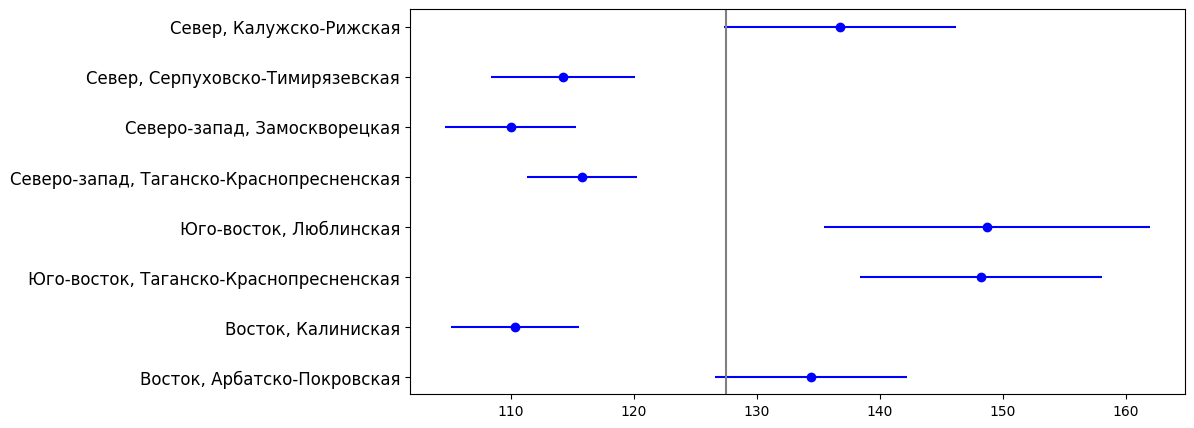

In [57]:
df = pd.read_csv('flat.csv', sep='\t')
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])

alpha = 0.01
df_agg['t_crit'] = df_agg['count'].apply(lambda w: stats.t(w - 1).ppf(1 - alpha/2))

# –Ω–∞ —Å–∫–æ–ª—å–∫–æ –æ—Ç—Å—Ç—É–ø–∞—Ç—å –≤–ø—Ä–∞–≤–æ –∏ –≤–ª–µ–≤–æ –æ—Ç –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])

district = [
    '–°–µ–≤–µ—Ä, –ö–∞–ª—É–∂—Å–∫–æ-–†–∏–∂—Å–∫–∞—è', '–°–µ–≤–µ—Ä, –°–µ—Ä–ø—É—Ö–æ–≤—Å–∫–æ-–¢–∏–º–∏—Ä—è–∑–µ–≤—Å–∫–∞—è', 
    '–°–µ–≤–µ—Ä–æ-–∑–∞–ø–∞–¥, –ó–∞–º–æ—Å–∫–≤–æ—Ä–µ—Ü–∫–∞—è', '–°–µ–≤–µ—Ä–æ-–∑–∞–ø–∞–¥, –¢–∞–≥–∞–Ω—Å–∫–æ-–ö—Ä–∞—Å–Ω–æ–ø—Ä–µ—Å–Ω–µ–Ω—Å–∫–∞—è', 
    '–Æ–≥–æ-–≤–æ—Å—Ç–æ–∫, –õ—é–±–ª–∏–Ω—Å–∫–∞—è', '–Æ–≥–æ-–≤–æ—Å—Ç–æ–∫, –¢–∞–≥–∞–Ω—Å–∫–æ-–ö—Ä–∞—Å–Ω–æ–ø—Ä–µ—Å–Ω–µ–Ω—Å–∫–∞—è',
    '–í–æ—Å—Ç–æ–∫, –ö–∞–ª–∏–Ω–∏—Å–∫–∞—è', '–í–æ—Å—Ç–æ–∫, –ê—Ä–±–∞—Ç—Å–∫–æ-–ü–æ–∫—Ä–æ–≤—Å–∫–∞—è'
]

center = df_agg['mean'].values
step = df_agg['step'].values

mu_hat = df.price.mean() # –æ–±—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ 

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(mu_hat, 0, color='grey');

–ü–æ—Å—Ç—Ä–æ–∏–º $95\%$ –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã –≤ —Å—Ä–µ–¥–Ω–∏—Ö. –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º $X_i, \;Y_i$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã –∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã, —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤–µ–ª–∏–∫–æ, –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç.
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\hat \sigma_x ^2}{n_x} + \frac{\hat \sigma_x ^2}{n_x}}} \overset{asy}{\sim} N(0, 1) 
$$

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

$X_i \sim \; iid \;N(\mu, \sigma_x ^2) \;\;\; Y_i \sim iid\;N(\mu, \sigma_y ^2)$ \
–ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –≤–µ–ª–∏—á–∏–Ω–∞ 
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\hat \sigma_x ^2}{n_x} + \frac{\hat \sigma_x ^2}{n_x}}}$$ 

1. –î–∏—Å–ø–µ—Ä—Å–∏–∏ –∏–∑–≤–µ—Å—Ç–Ω—ã: $\sim \; N(0, 1)$
2. –î–∏—Å–ø–µ—Ä—Å–∏–∏ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã, –Ω–æ —Ä–∞–≤–Ω—ã: 
$$ \frac{\bar x - \bar y - (\mu_x -\mu_y)}{\sqrt{\frac{\textcolor{red} {s ^2}}{n_x} + \frac{\textcolor{red} {s ^2}}{n_x}}} \sim t(n_x + n_y - 2)$$
–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ $\textcolor{red} {s ^2} = \frac{(n_x - 1) s_x ^2 + (n_y - 1)s_y ^2}{n_x + n_y - 2}$ \
3. –î–∏—Å–ø–µ—Ä—Å–∏–∏ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã, —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è:
–ü—Ä–æ–±–ª–µ–º–∞ –ë–µ—Ä–µ–Ω—Ü–∞-–§–∏—à–µ—Ä–∞.
$\sim t(v)$ 
$$v = \frac{(\frac{s_x ^2}{n_x} + \frac{s_y ^2}{n_y})^2}{\frac{s_x ^4}{n_x ^2 (n_x - 1)} + \frac{s_y ^ 4}{n_y ^2 (n_y - 1)}}$$ 
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–µ (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –£—ç–ª—á–∞)
–£—Å–ª–æ–≤–∏–µ: $n_x = n_y$, –ª–∏–±–æ  –º–µ–∂–¥—É $n_x$ –∏ $n_y$ —Ç–∞–∫–æ–π –∂–µ –∫–∞–∫ –º–µ–∂–¥—É $\sigma_x$ –∏ $\sigma_y$

#### –†–∞–∑–Ω–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–∏—Ö (–≤—ã–±–æ—Ä–∫–∏ –∑–∞–≤–∏—Å–∏–º—ã)
$X_i \sim \; iid \;N(\mu_x, \sigma_x ^2) \;\;\; Y_i \sim iid\;N(\mu_y, \sigma_y ^2)$ 
* –∏–∑–º–µ—Ä–µ–Ω–∏—è –¥–µ–ª–∞—é—Ç—Å—è –Ω–∞ –æ–¥–Ω–∏—Ö –∏ —Ç–µ—Ö –∂–µ –æ–±—ä–µ–∫—Ç–∞—Ö
* –ú–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø—Ä–∏—Ä–æ—Å—Ç –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–∞—Ö: $d_i = X_i - Y_i$, $\bar x - \bar y = \bar{x}\bar{-}\bar{y}$  
–ü–æ–ª—É—á–∞–µ–º —Å–∏—Ç—É–∞—Ü–∏—é —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –°—Ç—å—é–¥–µ–Ω—Ç–∞, –≥–¥–µ $$S^2 = \frac{1}{n - 1} * \sum (d_i - \bar d)^2$$
$\hat x \pm t_{1 - \frac{\alpha}{2}} * \frac{S}{\sqrt{n}}$

#### –¢–æ—á–Ω—ã–µ –î–ò –¥–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏

$X_1, \dots X_n \sim iid \; N(\mu, \sigma ^2)$
1. $\mu$ –∏–∑–≤–µ—Å—Ç–Ω–∞

$$s^2 = \frac{1}{n} \sum (X_i - \mu)^2 = $$ 
–ø–æ–¥ —Å—É–º–º–æ–π –Ω–∞—Ö–æ–¥–∏—Ç—Å—è $[N(0, \sigma ^2)]$ –∏ —ç—Ç–æ –Ω–∞–¥–æ –∫–∞–∫-—Ç–æ —Å–≤–µ—Å—Ç–∏ –∫ $\chi_n ^2$
$$\frac{\sigma ^2}{n} \sum \frac{(X_i - \mu)^2}{\sigma ^2} = \frac{\sigma ^2}{n} \chi_n ^2$$ 
–ü–æ–¥ —Å—É–º–º–æ–π —Ç–µ–ø–µ—Ä—å $[N(0, 1)/\sigma]^2$

–ü–µ—Ä–µ–∫–∏–¥—ã–≤–∞–µ–º $n, \; \sigma$ –≤ –ª–µ–≤—É—é —á–∞—Å—Ç—å. –ò –ø–æ –¢.–§–∏—à–µ—Ä–∞
$$ \frac{n * s^2}{\sigma ^2} = \sum \frac{(X_i - \mu)^2}{\sigma ^2} \sim \chi_n ^2$$
–ò —Ç–∞–∫ –º—ã –º–æ–∂–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –î–ò –¥–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏

$$P(\chi_n ^2 (\frac{\alpha}{2}) \leq \frac{n * s^2}{\sigma ^2} \leq \chi_n ^2 (\frac{1 - \alpha}{2})) = 1 - \alpha$$

$F(n, m)$ –Ω–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ!!!

$$P(\frac{n * s^2}{\chi_n ^2 (1 - \frac{\alpha}{2})} \leq \sigma ^2 \leq \frac{n * s^2}{\chi_n ^2 (\frac{\alpha}{2})}) = 1 - \alpha$$

2. –ï—Å–ª–∏ –º—ã –Ω–µ –∑–Ω–∞–µ—Ç $\mu$, —Ç–æ –º—ã –ø—Ä–æ—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º –æ—Ü–µ–Ω–∫—É $\bar X$, –Ω–æ –Ω–∞–º –Ω—É–∂–µ–Ω –Ω–æ–≤—ã–π —Å–æ—é–∑–Ω–∏–∫. –ò –Ω–∞–º –ø–æ–º–æ–∂–µ—Ç –¢.–§–∏—à–µ—Ä–∞ (2):
$$\frac{(n - 1)*s^2}{\sigma ^2} \sim \chi_{n - 1} ^2$$
–æ–¥–Ω–∞ —Å—Ç–µ–ø–µ–Ω—å —Å–≤–æ–±–æ–¥—ã —É—à–ª–∞ –≤ –æ—Ü–µ–Ω–∫—É –º–∞—Ç.–æ–∂–∞–¥–∞–Ω–∏–µ. 
$$P(\chi_{n - 1} ^2 (\frac{\alpha}{2}) \leq \frac{(n - 1) * s^2}{\sigma ^2} \leq \chi_{n - 1} ^2 (\frac{1 - \alpha}{2})) = 1 - \alpha$$
$$P(\frac{ (n - 1)* s^2}{\chi_{n - 1} ^2 (1 - \frac{\alpha}{2})} \leq \sigma ^2 \leq \frac{n * s^2}{\chi_{n - 1} ^2 (\frac{\alpha}{2})}) = 1 - \alpha$$